# BUDT 758J - Final Project
## Katie Dyachenko, Isabella Gaitan-Salanga, Yashvi Mohta, Nagasri Anusha Peri, Zarafsha Uzzaman

## Libraries Download



In [ ]:
!pip install catboost
!pip install xgboost

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.linear_model import Lasso
from math import sqrt

## Data Import

In [ ]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

##Exploratory Data Analysis on Train Data

In [ ]:
#general overview
# Import necessary libraries
import pandas as pd
#https://pandas.pydata.org/docs/getting_started/install.html
import matplotlib.pyplot as plt
#https://matplotlib.org/2.0.2/users/pyplot_tutorial.html
import seaborn as sns
#https://seaborn.pydata.org/tutorial/introduction.html

# Set visualisation styles
sns.set(style="whitegrid")

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(data_train.head())

data_train.info()



First few rows of the dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam   

In [ ]:
# Create a DataFrame to store column names and their data types
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Create a DataFrame to display data types
data_train_data_types_df = pd.DataFrame(data_train.dtypes, columns=['Data Type'])
data_train_data_types_df.reset_index(inplace=True)
data_train_data_types_df.columns = ['Feature', 'Data Type']

# Group data by 'Data Type' and list all columns for each type
grouped_data_types = data_train_data_types_df.groupby('Data Type')['Feature'].apply(list)

# Display the grouped information
print("Columns grouped by data type:")
print(grouped_data_types)

Columns grouped by data type:
Data Type
int64                                                                                              [Id, MSSubClass, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice]
float64                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
# Display summary statistics
print("\nSummary statistics of the dataset:")
print(data_train.describe())


Summary statistics of the dataset:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.06

In [ ]:
# Check for missing values
# Find columns that have any null values
null_columns = data_train.columns[data_train.isnull().any()]

# Display columns with nulls and the count of nulls in each column
print("Columns with null values and the count of nulls:")
for column in null_columns:
    print(f"{column}: {data_train[column].isnull().sum()} nulls")

Columns with null values and the count of nulls:
LotFrontage: 259 nulls
Alley: 1369 nulls
MasVnrType: 872 nulls
MasVnrArea: 8 nulls
BsmtQual: 37 nulls
BsmtCond: 37 nulls
BsmtExposure: 38 nulls
BsmtFinType1: 37 nulls
BsmtFinType2: 38 nulls
Electrical: 1 nulls
FireplaceQu: 690 nulls
GarageType: 81 nulls
GarageYrBlt: 81 nulls
GarageFinish: 81 nulls
GarageQual: 81 nulls
GarageCond: 81 nulls
PoolQC: 1453 nulls
Fence: 1179 nulls
MiscFeature: 1406 nulls


## EDA on Unclean Train Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# General overview of the data
print("Data Overview:")
print(data_train.info())

# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(data_train.describe())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64 

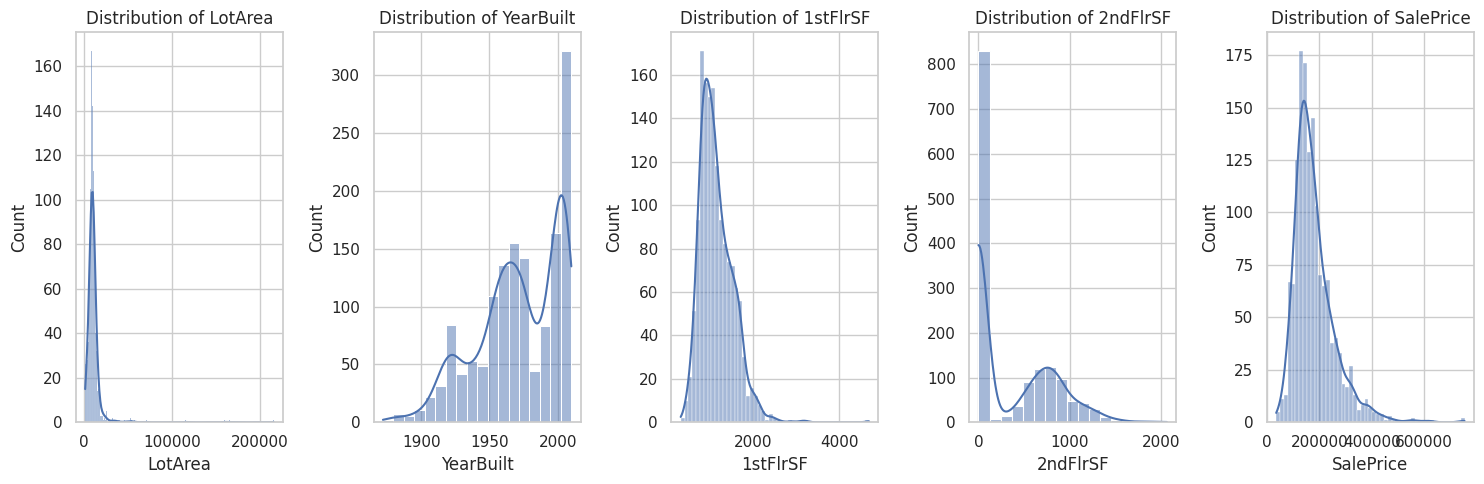

In [ ]:
# enumerate() from https://realpython.com/python-enumerate/
# plt.subplot from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
# tight_layout() from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

# Visualization of distribution for several numeric variables
numerical_features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'SalePrice']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.histplot(data_train[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

<ipython-input-69-49da0f5691e1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_train[col], palette='Set3')
<ipython-input-69-49da0f5691e1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_train[col], palette='Set3')
<ipython-input-69-49da0f5691e1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_train[col], palette='Set3')
<ipython-input-69-49da0f5691e1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=

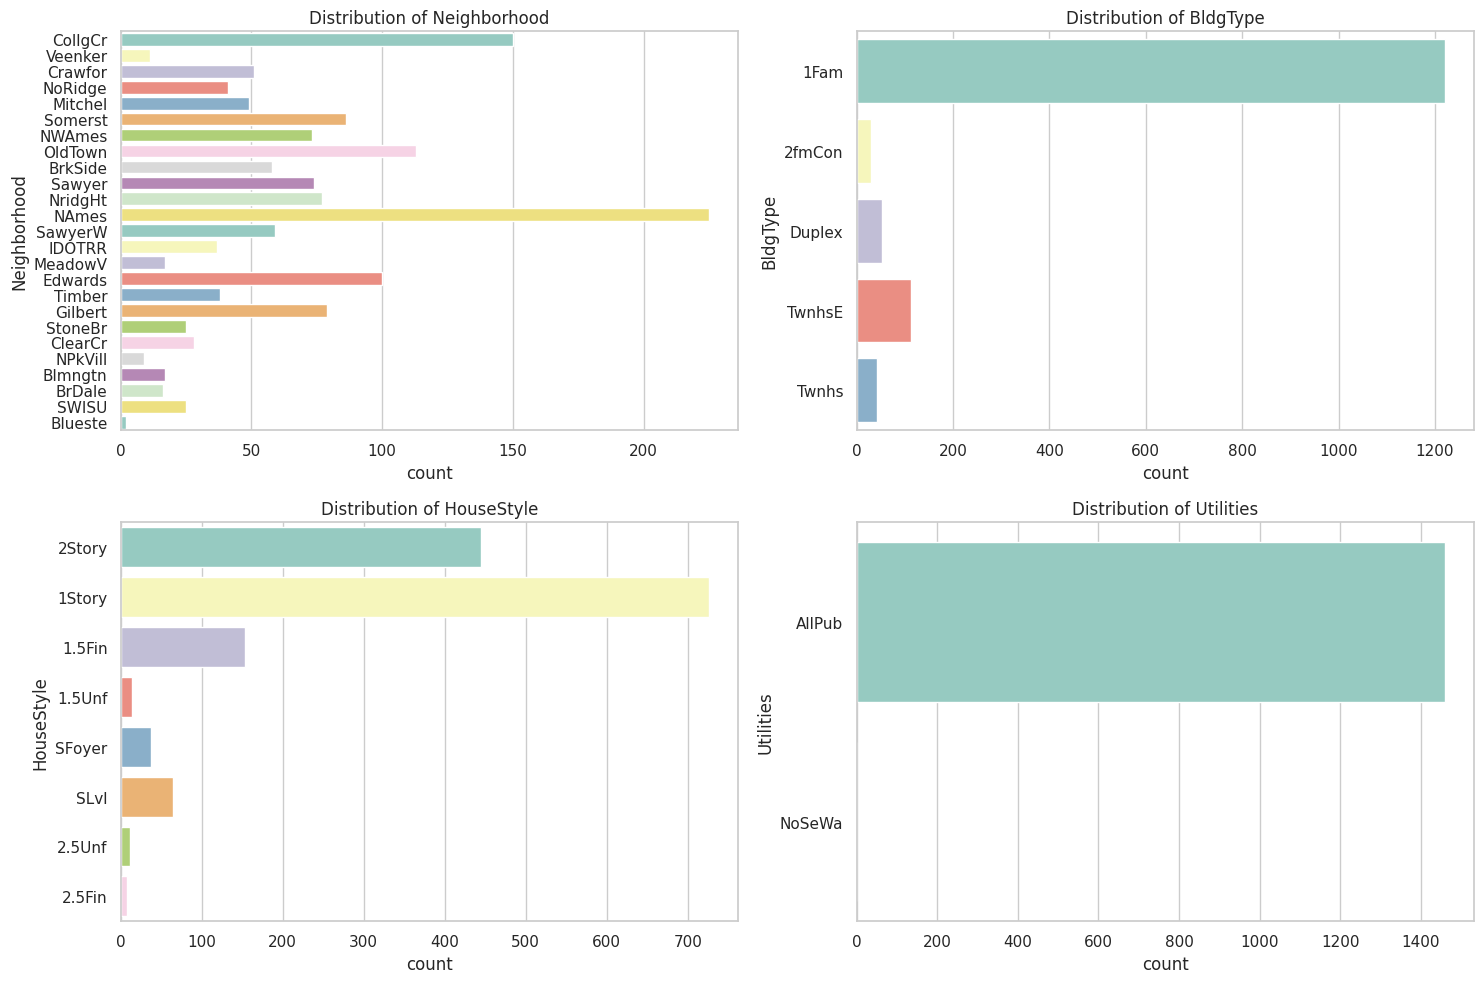

In [ ]:
# enumerate() from https://realpython.com/python-enumerate/
# plt.subplot from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
# sns.countplot() from https://seaborn.pydata.org/generated/seaborn.countplot.html
# tight_layout() from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

# Count of categorical data
categorical_features = ['Neighborhood', 'BldgType', 'HouseStyle', 'Utilities']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(y=data_train[col], palette='Set3')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

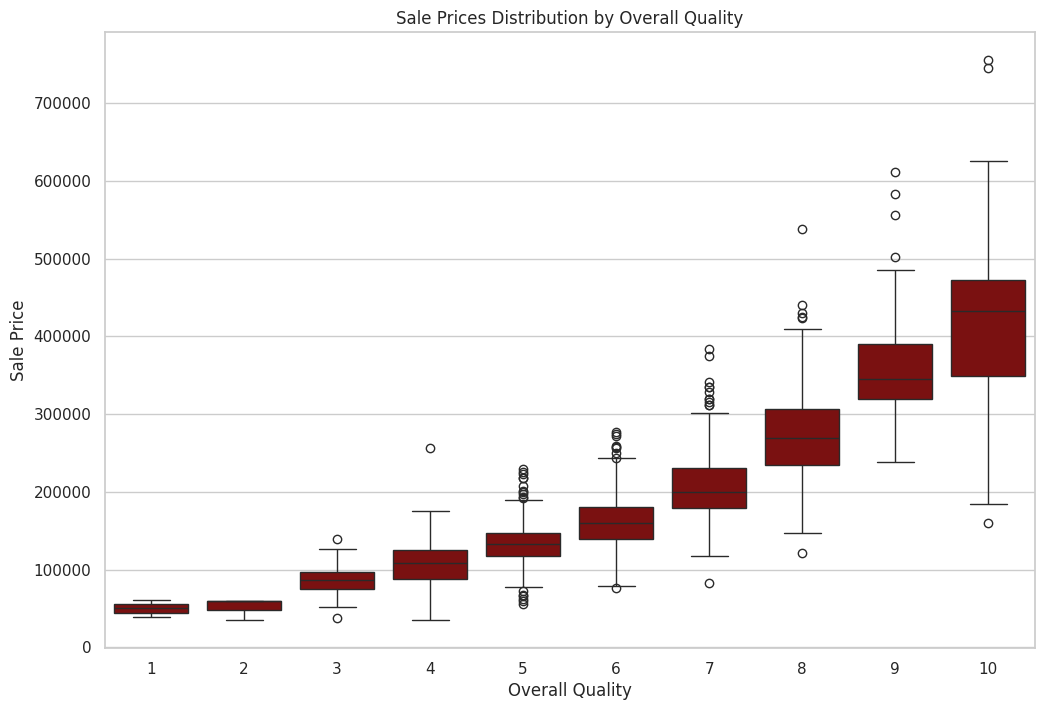

In [ ]:
# boxplot for Sale Prices by Overall Quality

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='OverallQual', y='SalePrice', data=data_train, color='darkred')
plt.title('Sale Prices Distribution by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

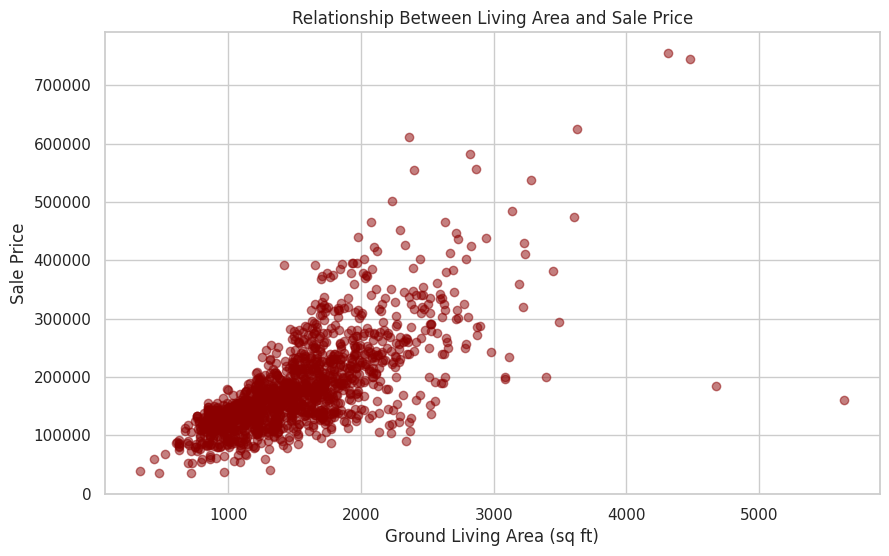

In [ ]:
# scatter plot of Sale Price vs. Living Area

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data_train['GrLivArea'], data_train['SalePrice'], alpha=0.5, color='darkred')
plt.title('Relationship Between Living Area and Sale Price')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

##Data Cleaning on Train

In [ ]:
##data cleaning variables
#variables:-FullBath	HalfBath	BedroomAbvGr	KitchenAbvGr	KitchenQual	TotRmsAbvGrd	Functional	Fireplaces	FireplaceQu	GarageType	GarageYrBlt	GarageFinish	GarageCars	GarageArea	GarageQual	GarageCond
columns_to_select = [
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
    'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
    'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'
]

# Select these columns
selected_df = data_train[columns_to_select]

##looking at each columns null values
null_columns = selected_df.columns[selected_df.isnull().any()]

# Display columns with nulls and the count of nulls in each column
print("Columns with null values and the count of nulls:")
for column in null_columns:
    print(f"{column}: {selected_df[column].isnull().sum()} nulls")

selected_df.info()


Columns with null values and the count of nulls:
FireplaceQu: 690 nulls
GarageType: 81 nulls
GarageYrBlt: 81 nulls
GarageFinish: 81 nulls
GarageQual: 81 nulls
GarageCond: 81 nulls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FullBath      1460 non-null   int64  
 1   HalfBath      1460 non-null   int64  
 2   BedroomAbvGr  1460 non-null   int64  
 3   KitchenAbvGr  1460 non-null   int64  
 4   KitchenQual   1460 non-null   object 
 5   TotRmsAbvGrd  1460 non-null   int64  
 6   Functional    1460 non-null   object 
 7   Fireplaces    1460 non-null   int64  
 8   FireplaceQu   770 non-null    object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageCars    1460 non-null   int64  
 13  GarageArea    1460 non-null   int64  
 14  GarageQual    1379 n

In [ ]:
#Full Bath:- full bathrooms above grade
#Half Bath:- hald bathrooms above grade
#Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
#KitchenAbvGr: Kitchens above grade
#TotRmsAbvGrd:- Total rooms above grade
#Fireplaces: Number of fireplaces
#GarageCars: Size of garage in car capacity
#GarageArea: Size of garage in square feet
#Doesnt have nulls,no need to change datatype works well with description

In [ ]:
##Function to change datatypes of columns
def change_dtypes(df, dtypes_dict):
    """
    Change data types of columns in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame.
        dtypes_dict (dict): A dictionary where keys are column names and values are the desired data types.

    Returns:
        pd.DataFrame: DataFrame with changed data types.
    """
    for col, dtype in dtypes_dict.items():
        df[col] = df[col].astype(dtype)
    return df

In [ ]:
data_train = change_dtypes(data_train, {'KitchenQual': 'string', 'Functional': 'string','FireplaceQu': 'string','GarageType': 'string','GarageYrBlt':'string','GarageFinish':'string','GarageQual':'string'})
# Print data types of specified columns
specified_columns = ['KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual']
print(data_train[specified_columns].dtypes)
data_train['GarageYrBlt'].astype(str)

KitchenQual     string[python]
Functional      string[python]
FireplaceQu     string[python]
GarageType      string[python]
GarageYrBlt     string[python]
GarageFinish    string[python]
GarageQual      string[python]
dtype: object


0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: object

In [ ]:
#FireplaceQu:Fireplace quality
data_train['FireplaceQu'] = data_train['FireplaceQu'].fillna("No Fireplace")
#	GarageType: Garage location
data_train['GarageType'] = data_train['GarageType'].fillna("No Garage")
#GarageYrBlt: Year Built
data_train['GarageYrBlt'] = data_train['GarageYrBlt'].fillna("Not Applicable")
#GarageFinish
data_train['GarageFinish'] = data_train['GarageFinish'].fillna("No Garage")
#GarageQual: Garage quality
data_train['GarageQual'] = data_train['GarageQual'].fillna("No Garage")
#GarageCond: Garage condition
data_train['GarageCond'] = data_train['GarageCond'].fillna("No Garage")


#Checking null
columns_to_select = [
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
    'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
    'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'
]
print(data_train[columns_to_select].isnull().any())

FullBath        False
HalfBath        False
BedroomAbvGr    False
KitchenAbvGr    False
KitchenQual     False
TotRmsAbvGrd    False
Functional      False
Fireplaces      False
FireplaceQu     False
GarageType      False
GarageYrBlt     False
GarageFinish    False
GarageCars      False
GarageArea      False
GarageQual      False
GarageCond      False
dtype: bool


In [ ]:
import pandas as pd

# Replace null values in categorical variables with "None"
categorical_cols = ['BsmtFinType1', 'BsmtFinType2']
data_train[categorical_cols] = data_train[categorical_cols].fillna('None')

# Replace null values in numerical variables with 0
numerical_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                  'BsmtFullBath', 'BsmtHalfBath']
data_train[numerical_cols] = data_train[numerical_cols].fillna(0)

# For Heating, HeatingQC, CentralAir, Electrical, either drop null rows or impute with mode
# Imputing with mode for simplicity
mode_cols = ['Heating', 'HeatingQC', 'CentralAir', 'Electrical']
for col in mode_cols:
    data_train[col].fillna(data_train[col].mode()[0], inplace=True)

# Check if nulls are handled
print(data_train.isnull().sum())


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [ ]:
# data cleaning of MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood,
# Condition1, Condition2, BldgType, and HouseStyle

# Train data
import pandas as pd

selected_columns = [
    'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
    'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle'
]

# Select these columns
df_with_selected_columns = data_train[selected_columns]

data_train.MSSubClass = data_train.MSSubClass.fillna('0').astype('int64')
data_train.MSZoning = data_train.MSZoning.fillna('None').astype('string')
data_train.LotFrontage = data_train.LotFrontage.fillna('0').astype('int64')
data_train.LotArea = data_train.LotArea.fillna('0').astype('int64')
data_train.Street = data_train.Street.fillna('None').astype('string')
data_train.Alley = data_train.Alley.fillna('None').astype('string')
data_train.LotShape = data_train.LotShape.fillna('None').astype('string')
data_train.LandContour = data_train.LandContour.fillna('None').astype('string')
data_train.Utilities = data_train.Utilities.fillna('None').astype('string')
data_train.LotConfig = data_train.LotConfig.fillna('None').astype('string')
data_train.LandSlope = data_train.LandSlope.fillna('None').astype('string')
data_train.Neighborhood = data_train.Neighborhood.fillna('None').astype('string')
data_train.Condition1 = data_train.Condition1.fillna('None').astype('string')
data_train.Condition2 = data_train.Condition2.fillna('None').astype('string')
data_train.BldgType = data_train.BldgType.fillna('None').astype('string')
data_train.HouseStyle = data_train.HouseStyle.fillna('None').astype('string')

# Output cleaned data types
print(df_with_selected_columns.dtypes)


MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
dtype: object


In [ ]:
############ categorical Vars #######################
#paved drive , no nulls converted type to category
data_train.PavedDrive = data_train.PavedDrive.astype('category')


#pool quality, replaced nulls with "no pool" and converted type to categorical
data_train.PoolQC = data_train.PoolQC.fillna('No Pool').astype('category')


#Fency quaility, replaced nulls with "no fence" and converted type to categorical
data_train.Fence = data_train.Fence.fillna('No Fence').astype('category')

#Miscellaneous, replaced nulls with none and converted to category
data_train.MiscFeature = data_train.MiscFeature.fillna('None').astype('category')

#Sale type, no nulls, converted to category
data_train.SaleType = data_train.SaleType.astype('category')

#Sale Condition, no nulls, converted to category
data_train.SaleCondition = data_train.SaleCondition.astype('category')


######## numerical variables #######
#wood deck square feet, no nulls kept as int64
data_train.WoodDeckSF


# open porch area square ft, no nulls kept as int64
data_train.OpenPorchSF.dtype


# enclosed porch area square ft, no nulls and kept as int64
data_train.EnclosedPorch


#3 season porch square ft, no nulls and kept as int64
data_train['3SsnPorch']

# screen porch area square ft, no nulls and kept as int64
data_train.ScreenPorch.dtype

#pool area square ft, no nulls and kept as int64
data_train.PoolArea.dtype

############### Time related variables

###### Month is still in int32 bcz of .dt.month
#also made another column that uses month names instead of numbers

data_train.MoSold = pd.to_datetime(data_train.MoSold, format='%m').dt.month

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November',
    12: 'December'}


#to get date time get rid of the .dt.year
data_train.YrSold =pd.to_datetime(data_train['YrSold'], format='%Y').dt.year


#Added a new combined month and Year Column
#remember to add citation!!!
data_train.Month_Year = data_train.MoSold.astype(str).str.zfill(2) + '-' + data_train.YrSold.astype(str)
data_train.Month_Year = pd.to_datetime(data_train.Month_Year, format='%m-%Y')
data_train.Month_Year



<ipython-input-79-357742cb3e63>:64: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_train.Month_Year = data_train.MoSold.astype(str).str.zfill(2) + '-' + data_train.YrSold.astype(str)


0      2008-02-01
1      2007-05-01
2      2008-09-01
3      2006-02-01
4      2008-12-01
          ...    
1455   2007-08-01
1456   2010-02-01
1457   2010-05-01
1458   2010-04-01
1459   2008-06-01
Length: 1460, dtype: datetime64[ns]

In [ ]:
#  Train Data
bella_variables = ['OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','Exterior1st','Exterior2nd',
                   'MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure']

# determine how many nulls per variable
print(data_train[bella_variables].isnull().sum())
print()

# determine what if year variables are int or date-type
print(data_train['YearBuilt'].dtype)
print(data_train['YearRemodAdd'].dtype)


OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrType      872
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
dtype: int64

int64
int64


In [ ]:
#Train Data

# numeric variables summary
bella_numeric = ['OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea']

numeric_stats = data_train[bella_numeric].describe()
print(numeric_stats, '\n')

# MasVnrArea replace nulls
data_train['MasVnrArea'] = data_train['MasVnrArea'].fillna(data_train['MasVnrArea'].mean()) # replace null with average of column
print(data_train['MasVnrArea'].isnull().sum(), '\n')
print(data_train['MasVnrArea'].describe())

       OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea
count  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000
mean      6.099315     5.575342  1971.267808   1984.865753   103.685262
std       1.382997     1.112799    30.202904     20.645407   181.066207
min       1.000000     1.000000  1872.000000   1950.000000     0.000000
25%       5.000000     5.000000  1954.000000   1967.000000     0.000000
50%       6.000000     5.000000  1973.000000   1994.000000     0.000000
75%       7.000000     6.000000  2000.000000   2004.000000   166.000000
max      10.000000     9.000000  2010.000000   2010.000000  1600.000000 

0 

count    1460.000000
mean      103.685262
std       180.569112
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [ ]:
# Train Data

# categorical replace nulls
# MasVnrType replace nulls
data_train['MasVnrType'] = data_train['MasVnrType'].fillna('None') # null represented NO (None) Masonry Veneer Type

# BsmtQual replace nulls
data_train['BsmtQual'] = data_train['BsmtQual'].fillna('No Basement') # null represented No Basement

# BsmtCond replace nulls
data_train['BsmtCond'] = data_train['BsmtCond'].fillna('No Basement') # null represented No Basement

# BsmtExposure replace nulls
data_train['BsmtExposure'] = data_train['BsmtExposure'].fillna('No Basement') # null represented No Basement

print()

# categorical variable summary
bella_categorical = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure']
print(data_train[bella_categorical], '\n')

# value counts per categorical column
for col in bella_categorical:
  print(data_train[col].value_counts())
  print()



     MasVnrType BsmtQual BsmtCond BsmtExposure
0       BrkFace       Gd       TA           No
1          None       Gd       TA           Gd
2       BrkFace       Gd       TA           Mn
3          None       TA       Gd           No
4       BrkFace       Gd       TA           Av
...         ...      ...      ...          ...
1455       None       Gd       TA           No
1456      Stone       Gd       TA           No
1457       None       TA       Gd           No
1458       None       TA       TA           Mn
1459       None       TA       TA           No

[1460 rows x 4 columns] 

MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

BsmtQual
TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: count, dtype: int64

BsmtCond
TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: count, dtype: int64

BsmtExposure
No             953
Av         

In [ ]:
# Converting Type - Train Data

for col in bella_numeric:
  data_train[col].astype('int64') # https://stackoverflow.com/questions/60682243/convert-data-type-of-multiple-columns-with-for-loop
  print(f'{col}: {data_train[col].dtype}') # https://stackoverflow.com/questions/40353079/pandas-how-to-check-dtype-for-all-columns-in-a-dataframe

bella_categorical_full = ['RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
                          'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure']
print()

for col in bella_categorical_full:
  data_train[col] = data_train[col].astype('category')
  print(f'{col}: {data_train[col].dtype}')

OverallQual: int64
OverallCond: int64
YearBuilt: int64
YearRemodAdd: int64
MasVnrArea: float64

RoofStyle: category
Exterior1st: category
Exterior2nd: category
MasVnrType: category
ExterQual: category
ExterCond: category
Foundation: category
BsmtQual: category
BsmtCond: category
BsmtExposure: category


<ipython-input-84-b28001892853>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='SalePrice', data=data_train, palette=red_gold_palette)
<ipython-input-84-b28001892853>:5: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=col, y='SalePrice', data=data_train, palette=red_gold_palette)
<ipython-input-84-b28001892853>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='SalePrice', data=data_train, palette=red_gold_palette)
<ipython-input-84-b28001892853>:5: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  s

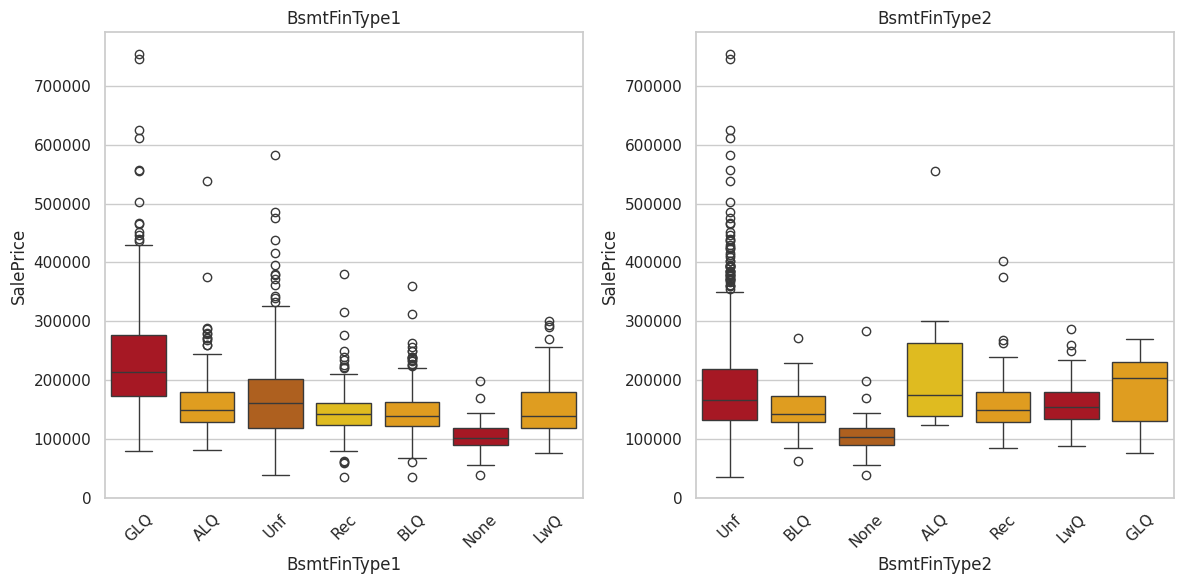

In [ ]:
# Boxplots for categorical variables
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=col, y='SalePrice', data=data_train, palette=red_gold_palette)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





####Interpretation of BsmtFin Type1 and BsmtFin Type 2
BsmtFinType1: GLQ (Good Living Quarters): This kind of basement shows a lot of variation in pricing for well-finished basements, with a wide range of sale prices and a few outliers.
Average Living Quarters, or ALQ,: More outliers than Rec in terms of median selling values, indicating that some homes with ALQ have higher sale prices.
Unf (Unfinished): Has a lower median price than the finished categories, but there are notable outliers that suggest some homes with unfinished basements sell for a high price.
The lowest median price is BLQ (Below Average Living Quarters), which might be a result of lesser size or lower demand.
Low quality (LwQ): Few data points imply that these finishes are either less frequent or less likely to be recorded. BsmtFinType2:
Unf: Dominates with the highest median price and many outliers, possibly indicating that having an unfinished secondary basement area does not negatively impact sale prices.
Rec and LwQ: Have similar median prices but fewer data points, which could mean these finishes are less common or less impactful on sale prices.
BLQ: Slightly lower median price than Rec and LwQ, suggesting it’s less valued by buyers.
ALQ: Shows a lower spread in sale prices with no visible outliers, indicating a more consistent impact on sale prices.
GLQ: Appears to have the lowest median price in BsmtFinType2, which is interesting as it contrasts with BsmtFinType1 where GLQ has a higher price range.
These box plots provide insights into how different types of basement finishes correlate with the sale prices of houses. Generally, good quality finishes in the primary basement area (BsmtFinType1) seem to command higher prices, whereas the impact of finishes in the secondary basement area (BsmtFinType2) is less pronounced. The presence of outliers in several categories indicates that there are exceptional cases where the sale price is significantly higher or lower than the typical range for that category.

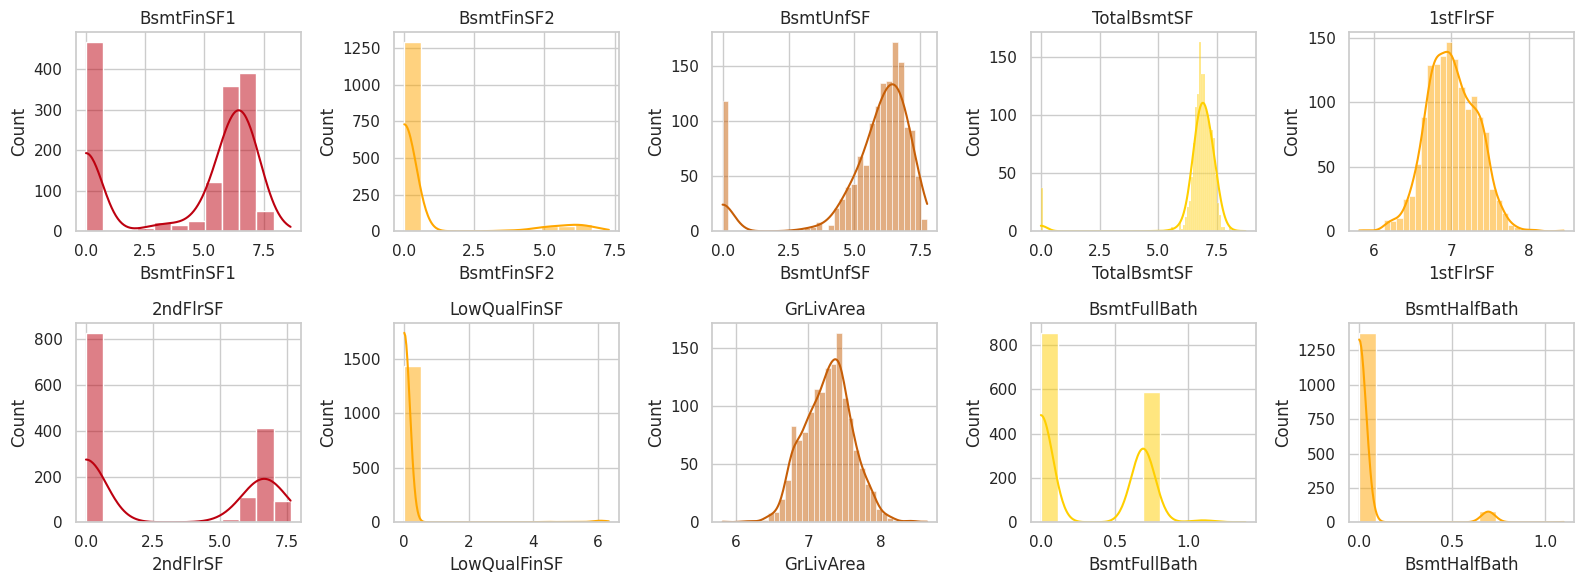

In [ ]:
import numpy as np

# Log transformation for skewed numerical variables
skewed_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
               '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
               'BsmtFullBath', 'BsmtHalfBath']

for col in skewed_cols:
    data_train[col] = np.log1p(data_train[col])

# Plot distribution after transformation
plt.figure(figsize=(16, 6))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2, 5, i)
    color_index = (i - 1) % len(red_gold_palette)  # Ensure index stays within range
    sns.histplot(data_train[col], kde=True, color=red_gold_palette[color_index])
    plt.title(col)
plt.tight_layout()
plt.show()






####Interpretation of the density plot
* BsmtFinSF1: Exhibits a bimodal distribution, suggesting two groups of houses, one with no finished area and another with a moderate amount of finished basement area.
* BsmtFinSF2: Shows that most houses do not have a second finished area in the basement, as indicated by the concentration of data points around 0.
* BsmtUnfSF: This right-skewed distribution indicates that while most houses have a small unfinished area in the basement, a few have a significantly larger unfinished area.
* TotalBsmtSF: The distribution is slightly right-skewed, with most houses having a moderate total basement area.
* 1stFlrSF: Also slightly right-skewed, this plot suggests that most houses have a moderate first-floor area, with some having a much larger area.
* 2ndFlrSF: The concentration of data points at 0 indicates many houses do not have a second floor. There’s a smaller peak around the middle range, representing houses with a moderate second-floor area.
* LowQualFinSF: Almost all houses have no low-quality finished square footage, as shown by the clustering at zero.
GrLivArea: This plot is slightly right-skewed, indicating most houses have a moderate above-ground living area, with a few having a much larger area.
* BsmtFullBath: Most houses have either zero or one full bathroom in the basement, with very few having more.
* BsmtHalfBath: Similar to BsmtFullBath, most houses do not have a half bathroom in the basement.

* The most popular Roofstyle was Gabled then Hip
* All houses typically have a first layer of Exterior Layering, and the most popular choices were vinyl, metal, wood, hard board, and brick. If houses had a second layer of exterior layering, the most popular choices were vinyl, metal, wood, hard board, and plywood.
*If houses had masonry veneer, the most popular type was brick.
* The quality of exterior material was typically considered good.
* The condition of exterial material was typical or average.
* Foundation was uaully made out of poured concrete, or cinderblocks.

If the home had a basement, the following points are applicable, otherwise, they are irrelavent.
* Basement quality was considered average or good.
* Basement Condition was considered typical or average.
* Most basement did not have access or exporusre to the garden/yard. If they had access, it was considered good exposure.

## EDA on Clean Train Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# General overview of the cleaned data
print("Cleaned Data Overview:")
print(data_train.info())

# Summary statistics for cleaned numerical features
print("\nSummary Statistics for Cleaned Numerical Features:")
print(data_train.describe())

Cleaned Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   string  
 3   LotFrontage    1460 non-null   int64   
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   string  
 6   Alley          1460 non-null   string  
 7   LotShape       1460 non-null   string  
 8   LandContour    1460 non-null   string  
 9   Utilities      1460 non-null   string  
 10  LotConfig      1460 non-null   string  
 11  LandSlope      1460 non-null   string  
 12  Neighborhood   1460 non-null   string  
 13  Condition1     1460 non-null   string  
 14  Condition2     1460 non-null   string  
 15  BldgType       1460 non-null   string  
 16  HouseStyle     1460 non-null   string  
 17  OverallQua

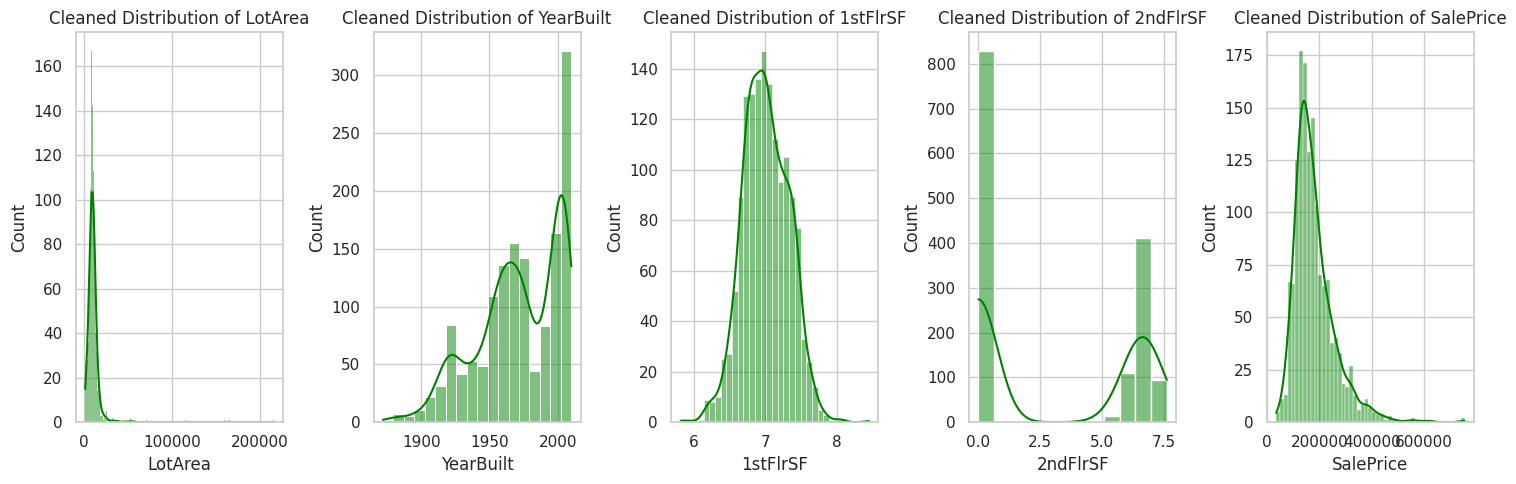

In [ ]:
# enumerate() from https://realpython.com/python-enumerate/
# plt.subplot from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
# tight_layout() from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

# Visualization of cleaned numeric variables
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.histplot(data_train[col], kde=True, color='green')
    plt.title(f'Cleaned Distribution of {col}')
plt.tight_layout()
plt.show()

<ipython-input-88-da1c9d90c176>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_train[col], palette='Set2')
<ipython-input-88-da1c9d90c176>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_train[col], palette='Set2')
<ipython-input-88-da1c9d90c176>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_train[col], palette='Set2')
<ipython-input-88-da1c9d90c176>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=

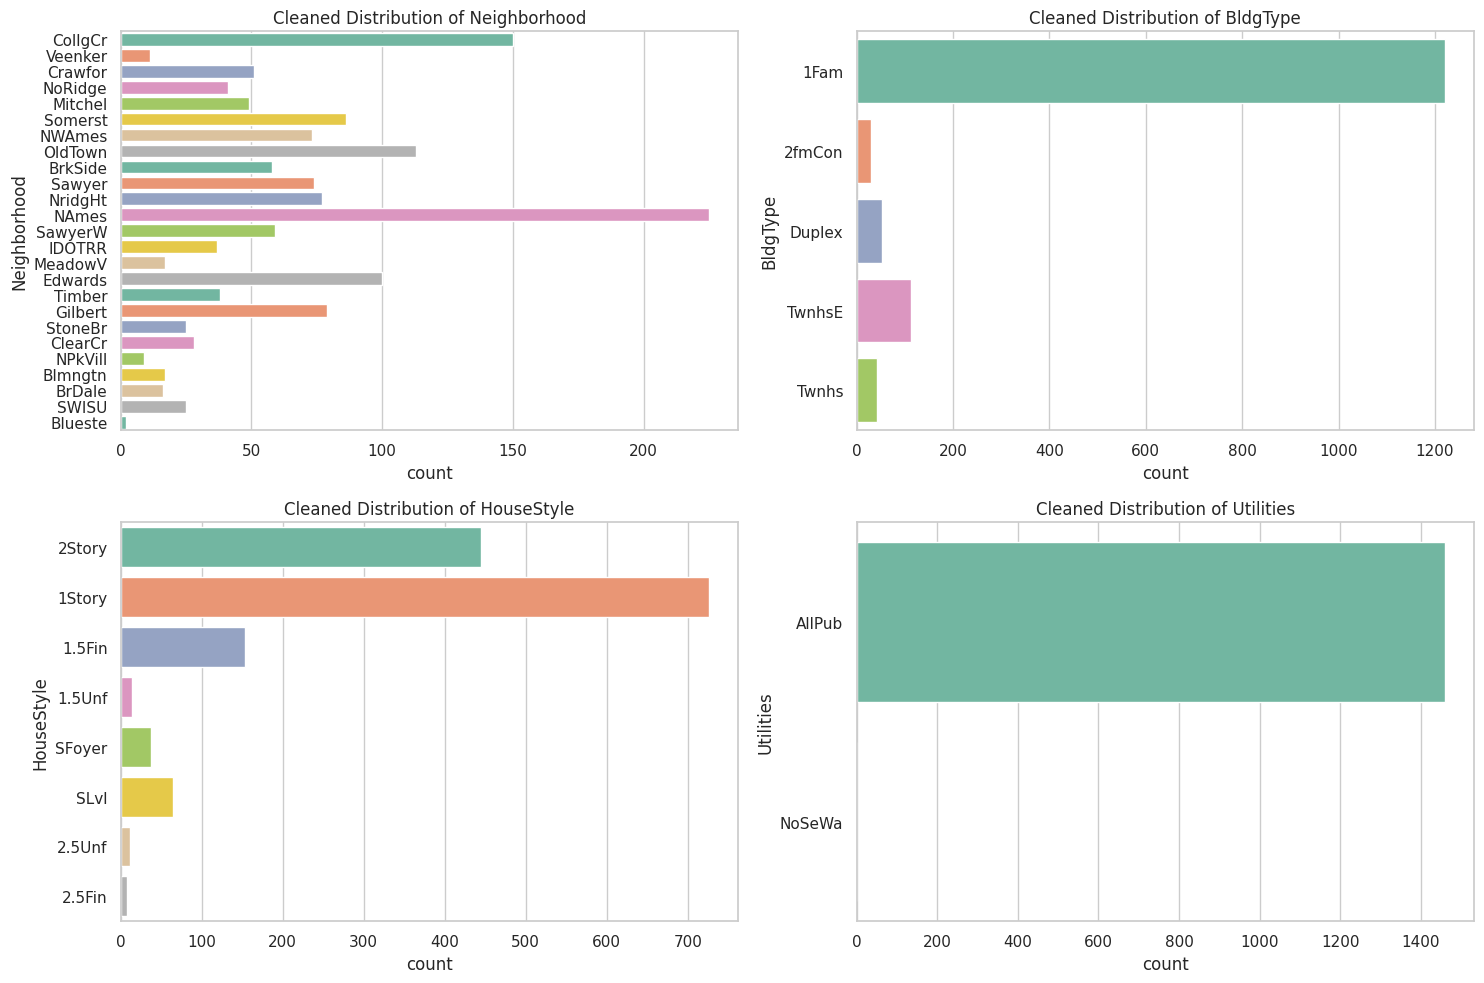

In [ ]:
# enumerate() from https://realpython.com/python-enumerate/
# plt.subplot from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
# sns.countplot() from https://seaborn.pydata.org/generated/seaborn.countplot.html
# tight_layout() from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

# Count of cleaned categorical data
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(y=data_train[col], palette='Set2')
    plt.title(f'Cleaned Distribution of {col}')
plt.tight_layout()
plt.show()

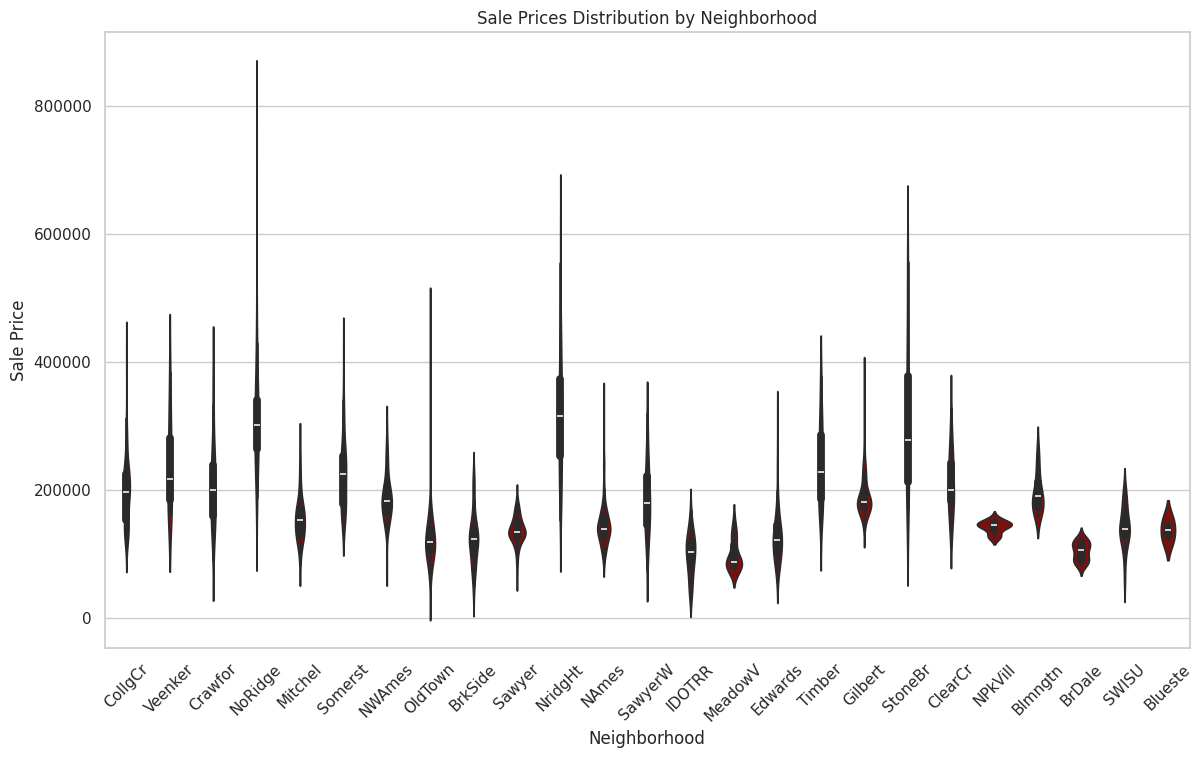

In [ ]:
# violin plot for Sale Prices by Neighborhood

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.violinplot(x='Neighborhood', y='SalePrice', data=data_train, color='darkred')
plt.xticks(rotation=45)
plt.title('Sale Prices Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.show()

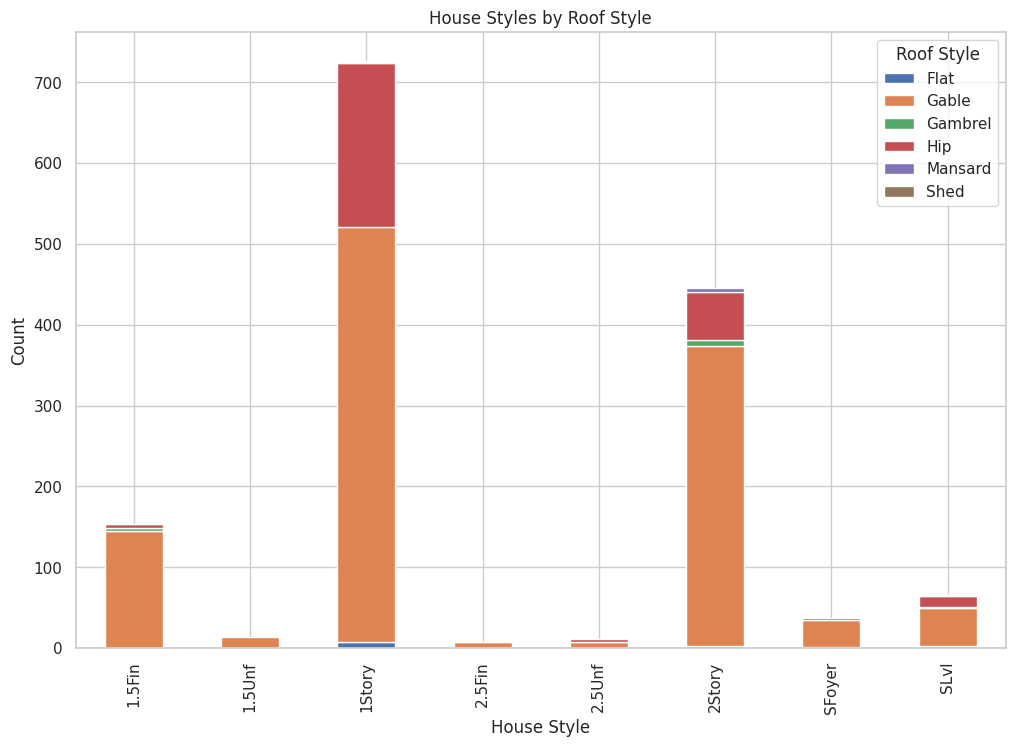

In [ ]:
# stacked bar chart for house styles by roof style

import pandas as pd
import matplotlib.pyplot as plt

# Creating a crosstab for the necessary columns
house_roof_ct = pd.crosstab(data_train['HouseStyle'], data_train['RoofStyle'])

# Creating a stacked bar chart
house_roof_ct.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('House Styles by Roof Style')
plt.xlabel('House Style')
plt.ylabel('Count')
plt.legend(title='Roof Style')
plt.show()

##Exploratory Data Analysis on Test Data

In [ ]:
#general overview
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualisation styles
sns.set(style="whitegrid")

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(data_test.head())


First few rows of the dataset:
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
# Create a DataFrame to store column names and their data types
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Create a DataFrame to display data types
data_test_data_types_df = pd.DataFrame(data_test.dtypes, columns=['Data Type'])
data_test_data_types_df.reset_index(inplace=True)
data_test_data_types_df.columns = ['Feature', 'Data Type']

# Group data by 'Data Type' and list all columns for each type
grouped_data_types_test = data_test_data_types_df.groupby('Data Type')['Feature'].apply(list)

# Display the grouped information
print("Columns grouped by data type:")
print(grouped_data_types_test)

Columns grouped by data type:
Data Type
int64                                                                                                                                                                                                             [Id, MSSubClass, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold]
float64                                                                                                                                                                                                                                                                                                                                                                       [LotFrontage, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, B

In [ ]:
# Display summary statistics
print("\nSummary statistics of the dataset:")
print(data_test.describe())


Summary statistics of the dataset:
                Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   45

In [ ]:
# Check for missing values
# Find columns that have any null values
null_columns_test = data_test.columns[data_test.isnull().any()]

# Display columns with nulls and the count of nulls in each column
print("Columns with null values and the count of nulls:")
for column in null_columns_test:
    print(f"{column}: {data_test[column].isnull().sum()} nulls")

Columns with null values and the count of nulls:
MSZoning: 4 nulls
LotFrontage: 227 nulls
Alley: 1352 nulls
Utilities: 2 nulls
Exterior1st: 1 nulls
Exterior2nd: 1 nulls
MasVnrType: 894 nulls
MasVnrArea: 15 nulls
BsmtQual: 44 nulls
BsmtCond: 45 nulls
BsmtExposure: 44 nulls
BsmtFinType1: 42 nulls
BsmtFinSF1: 1 nulls
BsmtFinType2: 42 nulls
BsmtFinSF2: 1 nulls
BsmtUnfSF: 1 nulls
TotalBsmtSF: 1 nulls
BsmtFullBath: 2 nulls
BsmtHalfBath: 2 nulls
KitchenQual: 1 nulls
Functional: 2 nulls
FireplaceQu: 730 nulls
GarageType: 76 nulls
GarageYrBlt: 78 nulls
GarageFinish: 78 nulls
GarageCars: 1 nulls
GarageArea: 1 nulls
GarageQual: 78 nulls
GarageCond: 78 nulls
PoolQC: 1456 nulls
Fence: 1169 nulls
MiscFeature: 1408 nulls
SaleType: 1 nulls


<ipython-input-96-1681b37e8f95>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_test[col], palette='Set3')
<ipython-input-96-1681b37e8f95>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_test[col], palette='Set3')
<ipython-input-96-1681b37e8f95>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_test[col], palette='Set3')
<ipython-input-96-1681b37e8f95>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=Fal

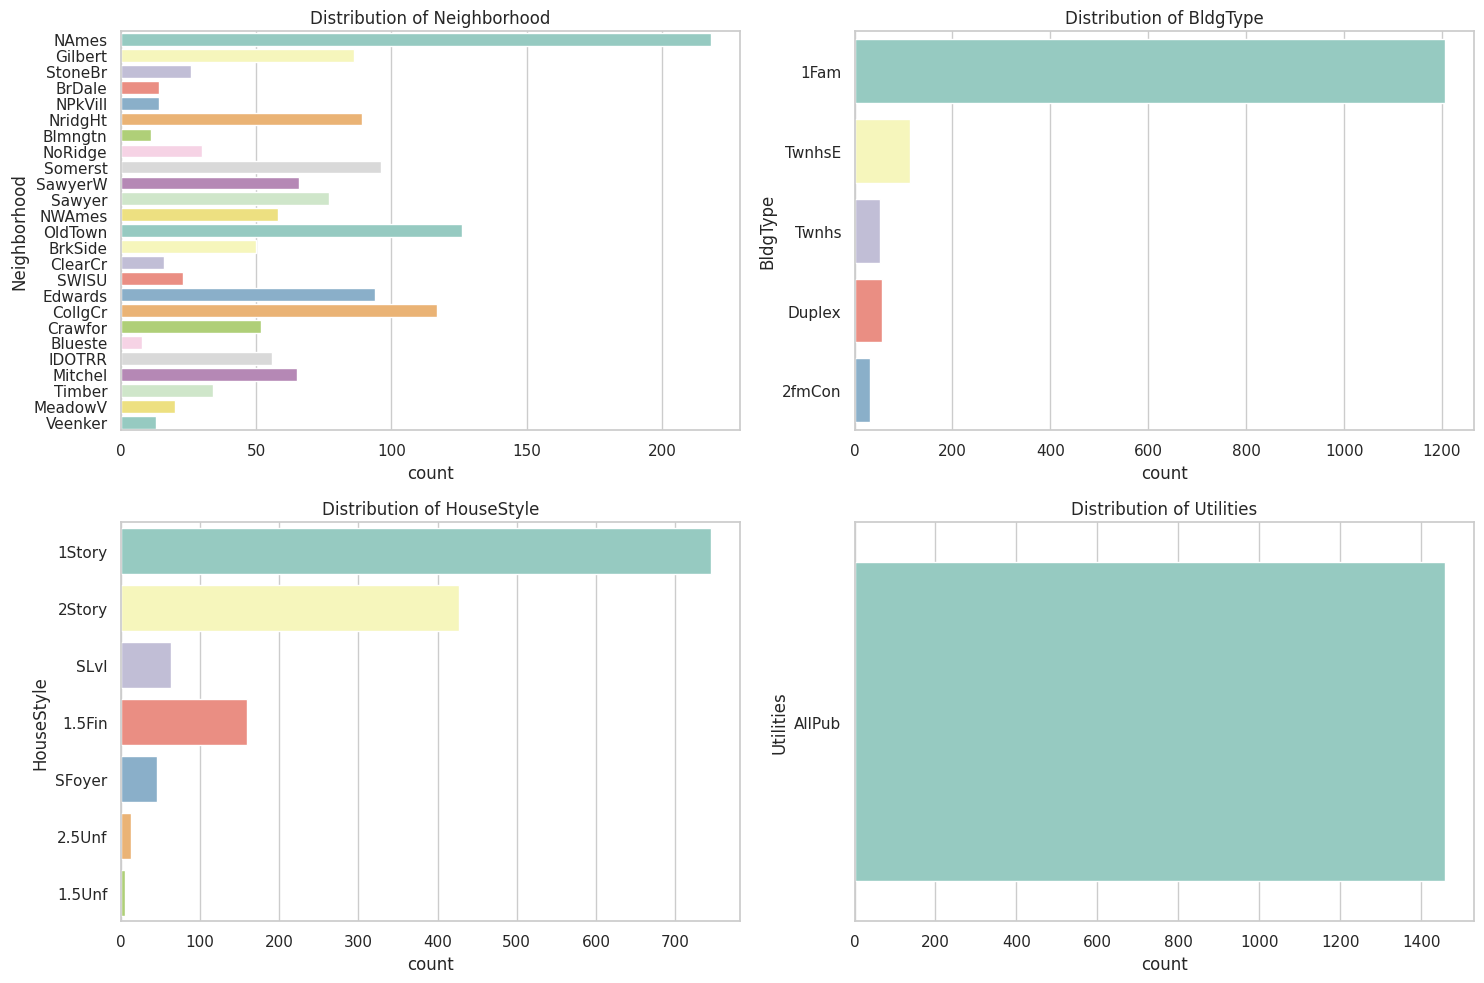

In [ ]:
# enumerate() from https://realpython.com/python-enumerate/
# plt.subplot from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
# sns.countplot() from https://seaborn.pydata.org/generated/seaborn.countplot.html
# tight_layout() from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

# distributionn of categorical variables

red_gold_palette = ['#bd0110', '#FFA700', '#c65e07', '#ffcf00', '#FFA500']

sns.set_palette(red_gold_palette)
categorical_features = ['Neighborhood', 'BldgType', 'HouseStyle', 'Utilities']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(y=data_test[col], palette='Set3')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

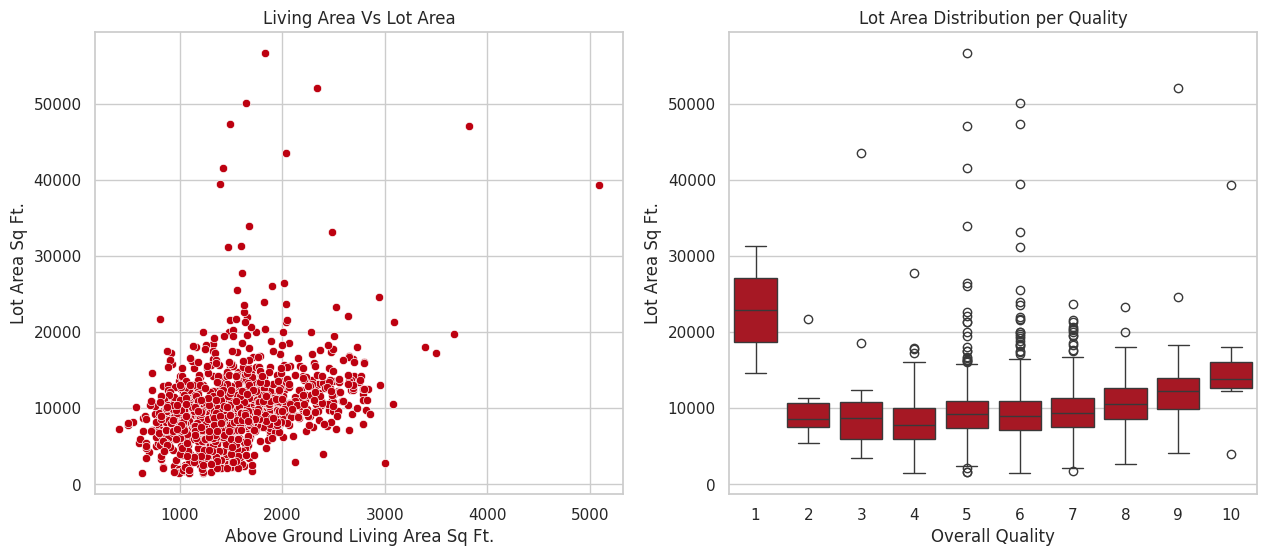

In [ ]:
#Living Area vs Area
#https://seaborn.pydata.org/generated/seaborn.set_palette.html
#https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

red_gold_palette = ['#bd0110', '#FFA700', '#c65e07', '#ffcf00', '#FFA500']

sns.set_palette(red_gold_palette)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(data = data_test, x='GrLivArea', y='LotArea', ax = axes[0])
axes[0].set_title('Living Area Vs Lot Area')
axes[0].set_xlabel('Above Ground Living Area Sq Ft.')
axes[0].set_ylabel('Lot Area Sq Ft.')


sns.boxplot(data = data_test, x='OverallQual', y='LotArea', ax = axes[1])
axes[1].set_title('Lot Area Distribution per Quality')
axes[1].set_xlabel('Overall Quality')
axes[1].set_ylabel('Lot Area Sq Ft.')
plt.show()


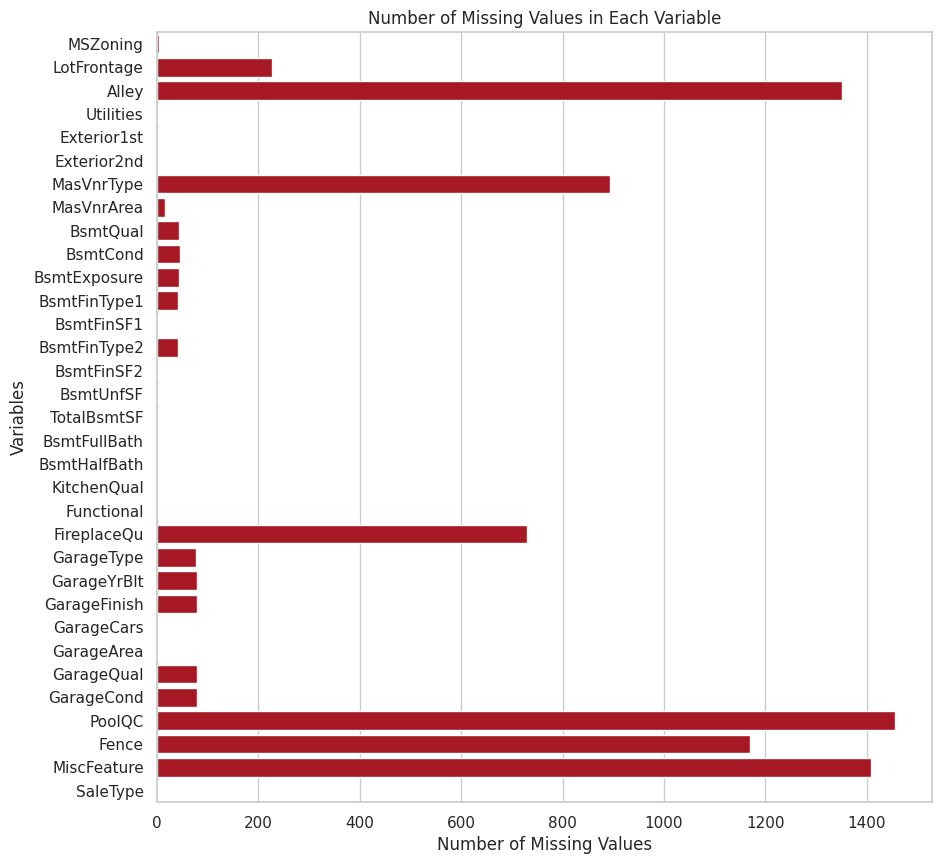

In [ ]:
#https://seaborn.pydata.org/generated/seaborn.barplot.html
import matplotlib.pyplot as plt
import seaborn as sns

red_gold_palette = ['#bd0110', '#FFA700', '#c65e07', '#ffcf00', '#FFA500']

sns.set_palette(red_gold_palette)
miss_vals = data_test.isnull().sum()[data_test.isnull().sum() > 0]
plt.figure(figsize=(10, 10))
sns.barplot(x=miss_vals.values, y= miss_vals.index)
plt.xlabel('Number of Missing Values')
plt.ylabel('Variables')
plt.title('Number of Missing Values in Each Variable')
plt.show()



##Data Cleaning on Test

In [ ]:
columns_to_select_test = [
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
    'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
    'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'
]

# Select these columns
selected_df_test = data_test[columns_to_select_test]

##looking at each columns null values
null_columns_test = selected_df_test.columns[selected_df_test.isnull().any()]

# Display columns with nulls and the count of nulls in each column
print("Columns with null values and the count of nulls:")
for column in null_columns_test:
    print(f"{column}: {selected_df_test[column].isnull().sum()} nulls")

selected_df_test.info()


Columns with null values and the count of nulls:
KitchenQual: 1 nulls
Functional: 2 nulls
FireplaceQu: 730 nulls
GarageType: 76 nulls
GarageYrBlt: 78 nulls
GarageFinish: 78 nulls
GarageCars: 1 nulls
GarageArea: 1 nulls
GarageQual: 78 nulls
GarageCond: 78 nulls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FullBath      1459 non-null   int64  
 1   HalfBath      1459 non-null   int64  
 2   BedroomAbvGr  1459 non-null   int64  
 3   KitchenAbvGr  1459 non-null   int64  
 4   KitchenQual   1458 non-null   object 
 5   TotRmsAbvGrd  1459 non-null   int64  
 6   Functional    1457 non-null   object 
 7   Fireplaces    1459 non-null   int64  
 8   FireplaceQu   729 non-null    object 
 9   GarageType    1383 non-null   object 
 10  GarageYrBlt   1381 non-null   float64
 11  GarageFinish  1381 non-null   object 
 12  GarageCars    1458 non-nu

In [ ]:
#Full Bath:- full bathrooms above grade
#Half Bath:- hald bathrooms above grade
#Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
#KitchenAbvGr: Kitchens above grade
#TotRmsAbvGrd:- Total rooms above grade
#Fireplaces: Number of fireplaces
#Doesnt have nulls,no need to change datatype works well with description

In [ ]:
data_test = change_dtypes(data_test, {'KitchenQual': 'string', 'Functional': 'string','FireplaceQu': 'string','GarageType': 'string','GarageYrBlt':'string','GarageFinish':'string','GarageQual':'string'})
# Print data types of specified columns
specified_columns_test = ['KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual']
data_test['GarageYrBlt'].astype(str)
print(data_test[specified_columns_test].dtypes)

KitchenQual     string[python]
Functional      string[python]
FireplaceQu     string[python]
GarageType      string[python]
GarageYrBlt     string[python]
GarageFinish    string[python]
GarageQual      string[python]
dtype: object


In [ ]:
#FireplaceQu:Fireplace quality
data_test['FireplaceQu'] = data_test['FireplaceQu'].fillna("No Fireplace")
#	GarageType: Garage location
data_test['GarageType'] = data_test['GarageType'].fillna("No Garage")
#GarageYrBlt: Year Built
data_test['GarageYrBlt'] = data_test['GarageYrBlt'].fillna("Not Applicable")
#GarageFinish
data_test['GarageFinish'] = data_test['GarageFinish'].fillna("No Garage")
#GarageQual: Garage quality
data_test['GarageQual'] = data_test['GarageQual'].fillna("No Garage")
#GarageCond: Garage condition
data_test['GarageCond'] = data_test['GarageCond'].fillna("No Garage")
#GarageCars: Size of garage in car capacity
data_test['GarageCars'] = data_test['GarageCars'].fillna(0)
#GarageArea:Size of garage in square feet
data_test['GarageArea'] = data_test['GarageArea'].fillna(0)

# Fill missing values for KitchenQual with the most common value
most_common_kitchen_qual = data_test['KitchenQual'].mode()[0]
data_test['KitchenQual'] = data_test['KitchenQual'].fillna(most_common_kitchen_qual)

# For Functional, assume typical functionality unless otherwise noted
data_test['Functional'] = data_test['Functional'].fillna('Typ')

#Checking null
columns_to_select_test = [
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
    'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
    'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'
]
print(data_test[columns_to_select_test].isnull().any())

FullBath        False
HalfBath        False
BedroomAbvGr    False
KitchenAbvGr    False
KitchenQual     False
TotRmsAbvGrd    False
Functional      False
Fireplaces      False
FireplaceQu     False
GarageType      False
GarageYrBlt     False
GarageFinish    False
GarageCars      False
GarageArea      False
GarageQual      False
GarageCond      False
dtype: bool


In [ ]:
#test
columns_to_select_test = ['BsmtFinType1', 'BsmtFinType2','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                  'BsmtFullBath', 'BsmtHalfBath','Heating', 'HeatingQC', 'CentralAir', 'Electrical']

# Select these columns
selected_df_test = data_test[columns_to_select_test]

##looking at each columns null values
null_columns_test = selected_df_test.columns[selected_df_test.isnull().any()]

# Display columns with nulls and the count of nulls in each column
print("Columns with null values and the count of nulls:")
for column in null_columns_test:
    print(f"{column}: {selected_df_test[column].isnull().sum()} nulls")

selected_df_test.info()

Columns with null values and the count of nulls:
BsmtFinType1: 42 nulls
BsmtFinType2: 42 nulls
BsmtFinSF1: 1 nulls
BsmtFinSF2: 1 nulls
BsmtUnfSF: 1 nulls
TotalBsmtSF: 1 nulls
BsmtFullBath: 2 nulls
BsmtHalfBath: 2 nulls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtFinType1  1417 non-null   object 
 1   BsmtFinType2  1417 non-null   object 
 2   BsmtFinSF1    1458 non-null   float64
 3   BsmtFinSF2    1458 non-null   float64
 4   BsmtUnfSF     1458 non-null   float64
 5   TotalBsmtSF   1458 non-null   float64
 6   1stFlrSF      1459 non-null   int64  
 7   2ndFlrSF      1459 non-null   int64  
 8   LowQualFinSF  1459 non-null   int64  
 9   GrLivArea     1459 non-null   int64  
 10  BsmtFullBath  1457 non-null   float64
 11  BsmtHalfBath  1457 non-null   float64
 12  Heating       1459 non-null   object 
 13  HeatingQC     1459 non-n

In [ ]:
# test
import pandas as pd


# Replace null values in categorical variables with "None"
categorical_cols = ['BsmtFinType1', 'BsmtFinType2']
data_test[categorical_cols] = data_test[categorical_cols].fillna('None')

# Replace null values in numerical variables with 0
numerical_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                  'BsmtFullBath', 'BsmtHalfBath']
data_test[numerical_cols] = data_test[numerical_cols].fillna(0)

# For Heating, HeatingQC, CentralAir, Electrical, either drop null rows or impute with mode
# Imputing with mode for simplicity
mode_cols = ['Heating', 'HeatingQC', 'CentralAir', 'Electrical']
for col in mode_cols:
    data_test[col].fillna(data_test[col].mode()[0], inplace=True)

# Check if nulls are handled
print(data_test.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [ ]:

# Test data
import pandas as pd

selected_columns = [
    'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
    'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle'
]

# Select these columns
df_with_selected_columns = data_test[selected_columns]

data_test.MSSubClass = data_test.MSSubClass.fillna('0').astype('int64')
data_test.MSZoning = data_test.MSZoning.fillna('None').astype('string')
data_test.LotFrontage = data_test.LotFrontage.fillna('0').astype('int64')
data_test.LotArea = data_test.LotArea.fillna('0').astype('int64')
data_test.Street = data_test.Street.fillna('None').astype('string')
data_test.Alley = data_test.Alley.fillna('None').astype('string')
data_test.LotShape = data_test.LotShape.fillna('None').astype('string')
data_test.LandContour = data_test.LandContour.fillna('None').astype('string')
data_test.Utilities = data_test.Utilities.fillna('None').astype('string')
data_test.LotConfig = data_test.LotConfig.fillna('None').astype('string')
data_test.LandSlope = data_test.LandSlope.fillna('None').astype('string')
data_test.Neighborhood = data_test.Neighborhood.fillna('None').astype('string')
data_test.Condition1 = data_test.Condition1.fillna('None').astype('string')
data_test.Condition2 = data_test.Condition2.fillna('None').astype('string')
data_test.BldgType = data_test.BldgType.fillna('None').astype('string')
data_test.HouseStyle = data_test.HouseStyle.fillna('None').astype('string')

# Output cleaned data types
print(df_with_selected_columns.dtypes)

MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
dtype: object


In [ ]:
#TEST varaibles

############ categorical Vars #######################
#paved drive , no nulls converted type to category
data_test.PavedDrive = data_test.PavedDrive.astype('category')


#pool quality, replaced nulls with "no pool" and converted type to categorical
data_test.PoolQC= data_test.PoolQC.fillna('No Pool').astype('category')

#Fency quaility, replaced nulls with "no fence" and converted type to categorical
data_test.Fence = data_test.Fence.fillna('No Fence').astype('category')


#Miscellaneous, replaced nulls with none and converted to category
data_test.MiscFeature = data_test.MiscFeature.fillna('None').astype('category')

#Sale type, 1 null , converted to category
data_test.SaleType= data_test.SaleType.fillna('None').astype('category')

#Sale Condition, no nulls, converted to category
data_test.SaleCondition = data_test.SaleCondition.astype('category')


######## numerical variables #######
#wood deck square feet, no nulls kept as int64
data_test.WoodDeckSF.dtype

# open porch area square ft, no nulls kept as int64
data_test.OpenPorchSF.dtype

# enclosed porch area square ft, no nulls and kept as int64
data_test.EnclosedPorch.dtype

#3 season porch square ft, no nulls and kept as int64
data_test['3SsnPorch'].dtype

# screen porch area square ft, no nulls and kept as int64
data_test.ScreenPorch.dtype

#pool area square ft, no nulls and kept as int64
data_test.PoolArea.dtype


### Time related variables

###### Month is still in int32 bcz of .dt.month
#also made another column that uses month names instead of numbers

data_test.MoSold = pd.to_datetime(data_test.MoSold, format='%m').dt.month

month_names = {
     1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
     7: 'July', 8: 'August', 9: 'September', 10: 'October',11: 'November',
    12: 'December'}


# to get date time get rid of the .dt.year
data_test.YrSold =pd.to_datetime(data_test['YrSold'], format='%Y').dt.year


#Added a new combined month and Year Column
#remember to add citation!!!
data_test.Month_Year = data_test.MoSold.astype(str).str.zfill(2) + '-' + data_test.YrSold.astype(str)
data_test.Month_Year = pd.to_datetime(data_test.Month_Year, format='%m-%Y')
data_test.Month_Year


<ipython-input-106-0da9b9125e24>:64: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_test.Month_Year = data_test.MoSold.astype(str).str.zfill(2) + '-' + data_test.YrSold.astype(str)


0      2010-06-01
1      2010-06-01
2      2010-03-01
3      2010-06-01
4      2010-01-01
          ...    
1454   2006-06-01
1455   2006-04-01
1456   2006-09-01
1457   2006-07-01
1458   2006-11-01
Length: 1459, dtype: datetime64[ns]

In [ ]:
# Test Data
bella_variables = ['OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','Exterior1st','Exterior2nd',
                   'MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure']

# determine how many nulls per variable
print(data_test[bella_variables].isnull().sum())
print()

# determine what if year variables are int or date-type
print(data_test['YearBuilt'].dtype)
print(data_test['YearRemodAdd'].dtype)


OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       1
Exterior2nd       1
MasVnrType      894
MasVnrArea       15
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
dtype: int64

int64
int64


In [ ]:
#Test Data

# numeric variables summary
bella_numeric = ['OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea']

numeric_stats = data_train[bella_numeric].describe()
print(numeric_stats, '\n')

# MasVnrArea replace nulls
data_test['MasVnrArea'] = data_test['MasVnrArea'].fillna(data_test['MasVnrArea'].mean()) # replace null with average of column
print(data_test['MasVnrArea'].isnull().sum(), '\n')
print(data_test['MasVnrArea'].describe())

       OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000
mean      6.099315     5.575342  1971.267808   1984.865753   103.685262
std       1.382997     1.112799    30.202904     20.645407   180.569112
min       1.000000     1.000000  1872.000000   1950.000000     0.000000
25%       5.000000     5.000000  1954.000000   1967.000000     0.000000
50%       6.000000     5.000000  1973.000000   1994.000000     0.000000
75%       7.000000     6.000000  2000.000000   2004.000000   164.250000
max      10.000000     9.000000  2010.000000   2010.000000  1600.000000 

0 

count    1459.000000
mean      100.709141
std       176.709824
min         0.000000
25%         0.000000
50%         0.000000
75%       162.000000
max      1290.000000
Name: MasVnrArea, dtype: float64


In [ ]:
#Test Data

# intial categorical variable summary
bella_categorical2 = ['Exterior1st','Exterior2nd','MasVnrType','BsmtQual','BsmtCond','BsmtExposure', ]
print(data_test[bella_categorical2], '\n')

# value counts per categorical column
for col in bella_categorical2:
  print(data_test[col].value_counts())
  print()

     Exterior1st Exterior2nd MasVnrType BsmtQual BsmtCond BsmtExposure
0        VinylSd     VinylSd        NaN       TA       TA           No
1        Wd Sdng     Wd Sdng    BrkFace       TA       TA           No
2        VinylSd     VinylSd        NaN       Gd       TA           No
3        VinylSd     VinylSd    BrkFace       TA       TA           No
4        HdBoard     HdBoard        NaN       Gd       TA           No
...          ...         ...        ...      ...      ...          ...
1454     CemntBd     CmentBd        NaN       TA       TA           No
1455     CemntBd     CmentBd        NaN       TA       TA           No
1456     VinylSd     VinylSd        NaN       TA       TA           No
1457     HdBoard     Wd Shng        NaN       Gd       TA           Av
1458     HdBoard     HdBoard    BrkFace       Gd       TA           Av

[1459 rows x 6 columns] 

Exterior1st
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdSh

In [ ]:
# Test Data

# categorical replace nulls
# Exterior1st replace nulls
data_test['Exterior1st'] = data_test['Exterior1st'].fillna('None') # null represents Not specified

# Exterior2nd replace nulls
data_test['Exterior2nd'] = data_test['Exterior1st'].fillna('None')  # null represents Not specified

# MasVnrType replace nulls
data_test['MasVnrType'] = data_test['MasVnrType'].fillna('None') # null represented NO (None) Masonry Veneer Type

# BsmtQual replace nulls
data_test['BsmtQual'] = data_test['BsmtQual'].fillna('No Basement') # null represented No Basement

# BsmtCond replace nulls
data_test['BsmtCond'] = data_test['BsmtCond'].fillna('No Basement') # null represented No Basement

# BsmtExposure replace nulls
data_test['BsmtExposure'] = data_test['BsmtExposure'].fillna('No Basement') # null represented No Basement

print()



# categorical variable summary
bella_categorical2 = ['Exterior1st','Exterior2nd','MasVnrType','BsmtQual','BsmtCond','BsmtExposure', ]
print(data_test[bella_categorical2], '\n')

# value counts per categorical column
for col in bella_categorical2:
  print(data_test[col].value_counts())
  print()



     Exterior1st Exterior2nd MasVnrType BsmtQual BsmtCond BsmtExposure
0        VinylSd     VinylSd       None       TA       TA           No
1        Wd Sdng     Wd Sdng    BrkFace       TA       TA           No
2        VinylSd     VinylSd       None       Gd       TA           No
3        VinylSd     VinylSd    BrkFace       TA       TA           No
4        HdBoard     HdBoard       None       Gd       TA           No
...          ...         ...        ...      ...      ...          ...
1454     CemntBd     CemntBd       None       TA       TA           No
1455     CemntBd     CemntBd       None       TA       TA           No
1456     VinylSd     VinylSd       None       TA       TA           No
1457     HdBoard     HdBoard       None       Gd       TA           Av
1458     HdBoard     HdBoard    BrkFace       Gd       TA           Av

[1459 rows x 6 columns] 

Exterior1st
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdS

In [ ]:
# Test Data

for col in bella_numeric:
  data_test[col].astype('int64') # https://stackoverflow.com/questions/60682243/convert-data-type-of-multiple-columns-with-for-loop
  print(f'{col}: {data_test[col].dtype}') # https://stackoverflow.com/questions/40353079/pandas-how-to-check-dtype-for-all-columns-in-a-dataframe

bella_categorical_full = ['RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
                          'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure']
print()

for col in bella_categorical_full:
  data_test[col] = data_test[col].astype('category')
  print(f'{col}: {data_test[col].dtype}')

OverallQual: int64
OverallCond: int64
YearBuilt: int64
YearRemodAdd: int64
MasVnrArea: float64

RoofStyle: category
Exterior1st: category
Exterior2nd: category
MasVnrType: category
ExterQual: category
ExterCond: category
Foundation: category
BsmtQual: category
BsmtCond: category
BsmtExposure: category


In [ ]:
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   string  
 3   LotFrontage    1460 non-null   int64   
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   string  
 6   Alley          1460 non-null   string  
 7   LotShape       1460 non-null   string  
 8   LandContour    1460 non-null   string  
 9   Utilities      1460 non-null   string  
 10  LotConfig      1460 non-null   string  
 11  LandSlope      1460 non-null   string  
 12  Neighborhood   1460 non-null   string  
 13  Condition1     1460 non-null   string  
 14  Condition2     1460 non-null   string  
 15  BldgType       1460 non-null   string  
 16  HouseStyle     1460 non-null   string  
 17  OverallQual    1460 non-null   in

## Exploratory Data Analysis - Visualization

In [ ]:
# Selecting numeric columns of interest
numeric_columns = ['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea']

# Calculate skewness for each numeric column
skewness = data_train[numeric_columns].apply(lambda x: x.skew())

print("Skewness of each distribution:")
print(skewness)

Skewness of each distribution:
FullBath        0.036562
HalfBath        0.675897
BedroomAbvGr    0.211790
KitchenAbvGr    4.488397
TotRmsAbvGrd    0.676341
Fireplaces      0.649565
GarageCars     -0.342549
GarageArea      0.179981
dtype: float64


<ipython-input-114-34eaccbdf75f>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


Text(0, 0.5, 'Number of Houses')

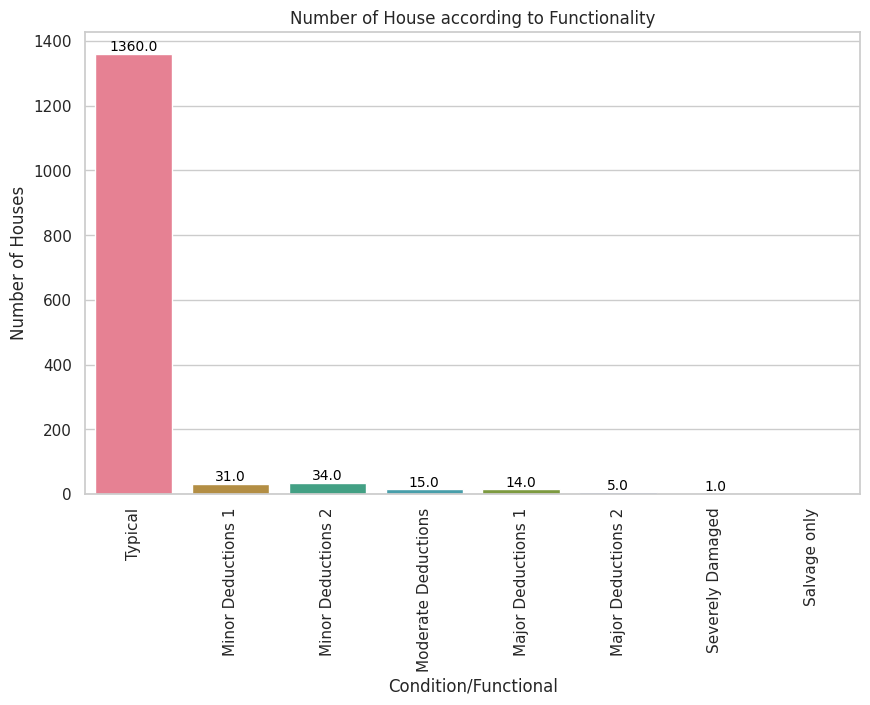

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#https://seaborn.pydata.org/generated/seaborn.countplot.html
# Define the new labels
new_labels = ['Typical', 'Minor Deductions 1', 'Minor Deductions 2', 'Moderate Deductions', 'Major Deductions 1', 'Major Deductions 2', 'Severely Damaged', 'Salvage only']

# Create the bar chart with the specified order and custom palette
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Functional', data=data_train, order=['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'], hue='Functional')

# Rotate x-axis tick labels
plt.xticks(rotation=90)

# Rename the x-axis tick labels
ax.set_xticklabels(new_labels)

# Add count of each label on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


# Set plot title and labels
plt.title('Number of House according to Functionality')
plt.xlabel('Condition/Functional')
plt.ylabel('Number of Houses')


######The graph predominantly showcases the "Typical" category, suggesting that most cases or items meet standard conditions. There's a stark contrast in frequency between "Typical" and all forms of deductions, with "Typical" being significantly more common. Minor deductions occur occasionally, but as the severity of issues increases, the frequency notably decreases. Categories indicating severe damage ("Severely Damaged" and "Salvage Only") are extremely rare. This distribution hints that most houses are in good condition where major problems are uncommon


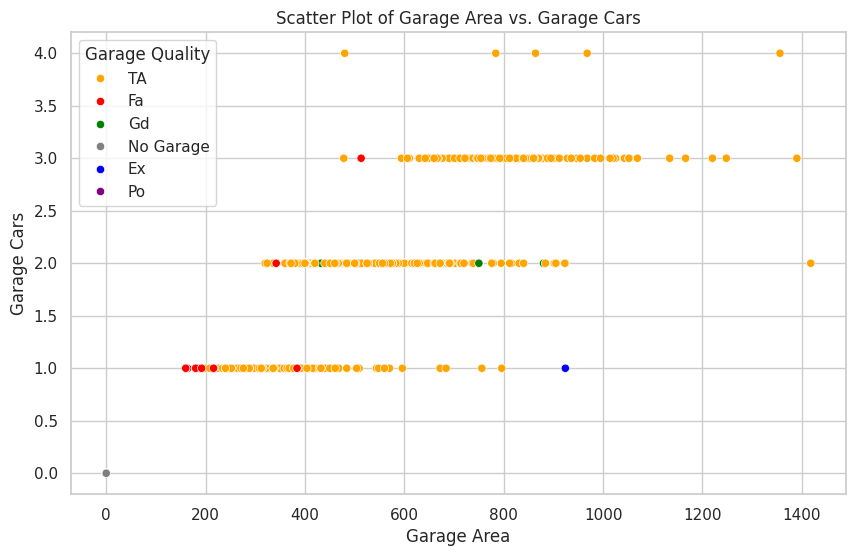

In [ ]:
##The scatter plot of Garage Area vs. Garage Cars colored by Garage Quality allows us to visually explore the
#relationship between these two variables and understand how Garage Quality influences this relationship.
# Define the color palette for different garage quality levels
palette = {'Ex': 'blue', 'Gd': 'green', 'TA': 'orange', 'Fa': 'red', 'Po': 'purple','No Garage':'grey'}

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GarageArea', y='GarageCars', hue='GarageQual', palette=palette, data=data_train)

# Set plot title and labels
plt.title('Scatter Plot of Garage Area vs. Garage Cars')
plt.xlabel('Garage Area')
plt.ylabel('Garage Cars')

# Show legend
plt.legend(title='Garage Quality')

# Show the plot
plt.show()

######The scatter plot illustrates a clear correlation between garage area and the capacity to hold cars, with larger garages generally accommodating more vehicles. Most garages fall into the "Typical" or "Good" quality categories, indicating a standard distribution. Exceptionally high-quality ("Excellent") garages are not only rare but also distinctly larger, capable of housing more cars. Conversely, garages of "Poor" quality are notably smaller. Interestingly, there are anomalies where properties marked as "No Garage" still report capacity for cars, potentially indicating misclassified data or alternative parking arrangements.

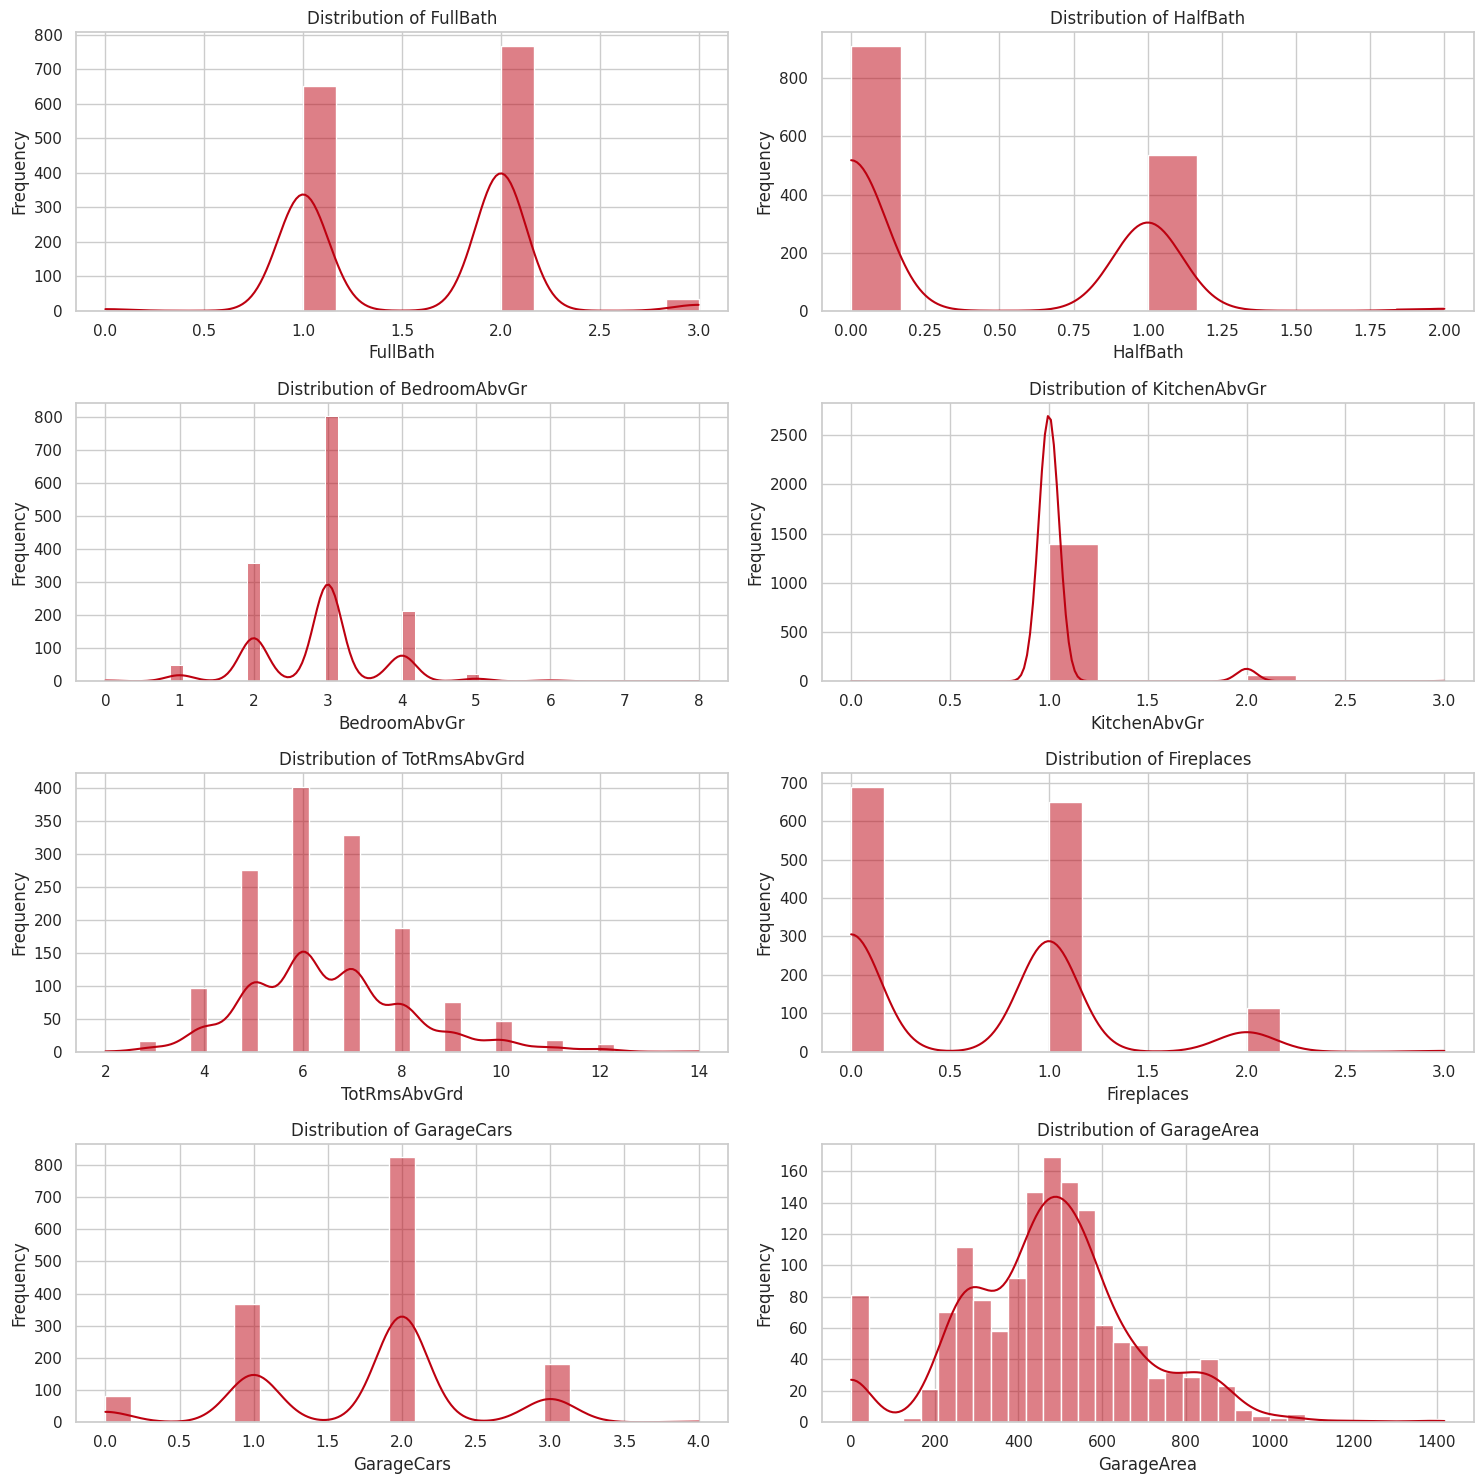

In [ ]:
##Distribution of All Numeric Variables
# Selecting numeric columns of interest
numeric_columns = ['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea']

# Create subplots for each numeric column
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numeric column and plot its histogram
for i, column in enumerate(numeric_columns):
    sns.histplot(data_train[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

Insights on each graph
Distribution of FullBath

Most homes have 1 or 2 full bathrooms, with 2 bathrooms being the most common setup.

Very few homes have no full bathrooms or more than 3, indicating standard housing designs.

Distribution of BedroomAbvGr

The majority of homes have 2 to 4 bedrooms, with 3 bedrooms being the most frequent.
Homes with more than 5 bedrooms are rare, suggesting a focus on moderate family sizes in housing.
Distribution of HalfBath

A significant number of homes have 1 half bath, while many have none.
Very few homes have more than 1 half bath, showing it's less commonly a multiple feature.
Distribution of KitchenAbvGr

Nearly all homes have exactly 1 kitchen, with multiple kitchens being extremely uncommon.
This uniformity indicates standard building practices around single-kitchen homes.
Distribution of TotRmsAbvGrd

Homes typically have between 4 and 8 total rooms above ground, peaking at 6 rooms.
Very few homes have fewer than 4 or more than 10 rooms, highlighting common room allocations.
Distribution of Fireplaces

Many homes have 1 fireplace, though a significant number have none.
Multiple fireplaces (2 or more) are less common, reflecting their status as a luxury or optional feature.
Distribution of GarageCars

The most common configurations are homes with space for 2 cars in the garage.
Garages that accommodate more than 3 cars are very rare, suggesting luxury or specialized homes.
Distribution of GarageArea

Garage sizes typically range around 200 to 600 square feet, aligning with capacity for about 2 cars.
Larger garage areas (above 800 square feet) are less common, usually associated with higher-capacity garages.


In [ ]:
import plotly.express as px

# Plotting the distribution of MSSubClass values
fig = px.histogram(data_train, x='MSSubClass', nbins=18, color_discrete_sequence=red_gold_palette)
fig.update_layout(
    title_text='Interactive Distribution of Building Classes', # title of plot
    xaxis_title_text='MSSubClass', # xaxis label
    yaxis_title_text='Frequency', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
)
fig.show()

In [ ]:
# Preparing the data for plotting
mszoning_counts = data_train['MSZoning'].value_counts().reset_index()
mszoning_counts.columns = ['MSZoning', 'Frequency']

# Creating an interactive pie chart for the MSZoning column
fig = px.pie(mszoning_counts, values='Frequency', names='MSZoning', title='Interactive Pie Chart of Zoning Classifications',
             hover_data=['MSZoning'], labels={'MSZoning':'Zoning Classification', 'Frequency':'Frequency'},
             color_discrete_sequence=red_gold_palette)

# Adding drill-down capabilities through click events or interactions can be complex and might require integrating with JavaScript for full functionality.
# For now, we enhance interactivity through hover information and dynamic slicing.
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(transition={'duration': 500})

fig.show()


In [ ]:
# Check the frequency of each value in the BldgType column
bldgtype_value_counts = data_train['BldgType'].value_counts().reset_index()
bldgtype_value_counts.columns = ['BldgType', 'Counts']  # Renaming for clarity

# Create a horizontal bar chart
fig = px.bar(bldgtype_value_counts, x='Counts', y='BldgType',
             color='BldgType', orientation='h',
             labels={'Counts': 'Number of Properties'},
             title='Horizontal Bar Chart of Types of Dwelling',
             color_discrete_sequence=red_gold_palette)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig.show()

* Distribution of MSSubClass: Buildings that have a class of 20-29 and 60-69 are much more frequent than others
Subclasses like 20, which could represent single-family homes in a certain style or era, appear particularly prevalent.
Distribution of MSZoning

* The majority of properties in the dataset are classified as Residential Low Density (RL), making it the predominant zoning classification. This suggests that the dataset largely represents suburban or low-density residential areas.
Understanding the distribution of zoning types can be valuable for urban planning, real estate development, and policy-making.
Distribution of LotFrontage

* The Distribution of Linear Feet of Street Connected to Property is skewed, with more properties having a smaller frontage and fewer properties with extensive frontage. This is typical as most urban and suburban plots have standard dimensions, while larger frontages are rarer and possibly linked to premium properties.
* LotFrontage generally has a positive correlation with property value because a larger frontage increases curb appeal and provides more usable space, potentially enhancing the property’s value.
Distribution of LotArea

* Most properties have smaller lot sizes, common in urban and suburban settings, while larger lots are rarer and mostly found in rural or less densely populated areas.
LotArea generally correlates with property value; larger lots typically command higher prices, particularly in regions where space is at a premium.
Distribution of Street

* There is a predominance of paved streets. Properties on paved streets generally have better accessibility, which is a critical factor in real estate valuation.
* Gravel streets are less common and might indicate properties that are in rural areas or older parts of towns where modern infrastructure has not been fully developed.
Distribution of Alley

* The majority of properties are likely to have no alley access. This is common in newer developments and certain urban or suburban settings where properties are designed with front street access only.
* The properties that do have an alley access tend to have gravel alleys, adding a rustic charm or fit the aesthetic of certain historic or rural areas.
Distribution of LotShape

* The Regular shape of the property is the most common, indicating that most properties have standard, rectangular lot shapes.
IR1' (slightly irregular) is the next most common shape, suggesting slight variations in lot geometry which can be due to natural features or plot divisions.
Distribution of LandContour

* The 'Lvl' (Level) category is the most prevalent, indicating that most properties are on flat land.
Categories like 'Bnk' (Banked), 'HLS' (Hilly), and 'Low' (Depression) are less common but indicate significant variations in elevation and slope.
Distribution of Utilities

* The 'AllPub' category, representing properties with all public utilities, is dominatant, reflecting typical urban and suburban development standards where full utilities are a basic requirement.
Categories like 'NoSewr' (no sewer), 'NoSeWa' (no sewer and water), and 'ELO' (electricity only) are much less common. These reflect older properties, rural areas, or properties that have not been updated or connected to newer infrastructure systems.
Distribution of LotConfig

* The 'Inside' configuration is the most prevalent, indicating that most properties are positioned away from the corner, typically associated with less traffic and noise.
'Corner' lots are also common, offering more exposure and possibly more light but might also deal with more traffic.
Distribution of LandSlope

* 'Gtl' (Gentle slope) is the most prevalent category, reflecting the typical preference for building on gently sloping land, which minimizes construction challenges.
* Properties on moderate and severe slopes might require specialized design and construction techniques, which could either increase costs or create unique properties with scenic views and distinctive appeal.
Distribution of Neighborhood

* 'Names' is the most populated neighborhood in terms of listed properties, followed by 'CollgCr' and 'OldTown'.
* Neighborhoods like 'Blueste', 'NPkVill', and 'Veenker' have fewer properties listed, which might suggest these are smaller, more exclusive, or newer areas within the dataset.
Distribution of Condition1

* The 'Norm' condition (representing normal conditions with no significant external influences) is the most prevalent.
* Properties close to main roads ('Artery', 'Feedr') might suffer from reduced desirability due to noise, pollution, and higher traffic, which could negatively affect their value.
Distribution of Condition2

* Secondary conditions such as those described in Condition2 are generally less frequent than primary conditions (Condition1). This suggests that while many properties may be near a significant feature like a main road or railroad, it is less common for properties to be affected by more than one of these features.
Distribution of BldgType

* 1Fam' (single-family detached homes) is the most common building type in the dataset. This prevalence suggests a strong market demand for independent housing, reflecting a preference for privacy and larger living spaces that are typical of suburban areas.
* The presence of 'Duplx' (duplexes), 'TwnhsE' (townhouse end units), and 'TwnhsI' (townhouse inside units) indicates variability in housing options. These types cater to different demographic segments, such as smaller families, first-time homeowners, or those seeking lower-cost housing alternatives.
Distribution of HouseStyle

* A significant number of '1Story' homes has an appeal among older adults or those seeking to avoid stairs for accessibility reasons. Single-story homes are often in demand in regions where retirees are a significant demographic.
'2Story' (two-story homes) are the second most popular style of dwelling, this suggests a preference for larger homes that provide more living space, often favored by families.

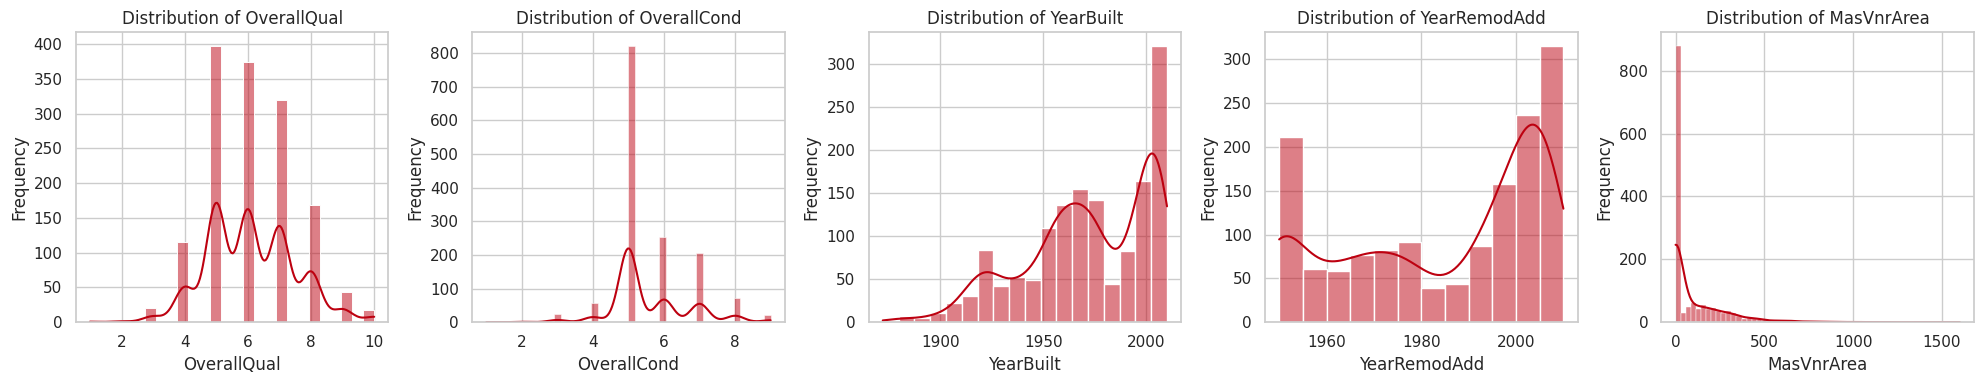

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

bella_variables = ['OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','Exterior1st','Exterior2nd',
                   'MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure']

# red_gold_palette = ['#bd0110', '#FFA700', '#c65e07', '#ffcf00', '#FFA500']

# define numerical variables
bella_numeric = ['OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea']

# create subplots for each numeric column
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,4))

# flatten the axes array for easy iteration
axes = axes.flatten()

# loop for each numeric column and plot respective historgam

for i, col in enumerate(bella_numeric):
  sns.histplot(data_train[col], kde=True, color='#bd0110', ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# https://seaborn.pydata.org/generated/seaborn.histplot.html

* Based on the findings, Overall Distribution and Overall Condition are typically falling in the middle ranges. Relatively houses in the dataset are receiving average to above average reviews, but not doing overly poor or astoundingly either.
* Most homes do not have Masonry Veneer, and if they do, it's in smaller sqft areas.
* As time progressed, more houses were built closer to the 2000s. Either more houses were built, or more houses that were built in this time period were recorded in the dataset.
* First sign of remodelling was around 1950's and similar to when homes were built, it was much more poopular to remodel your home in the 2000s or later.

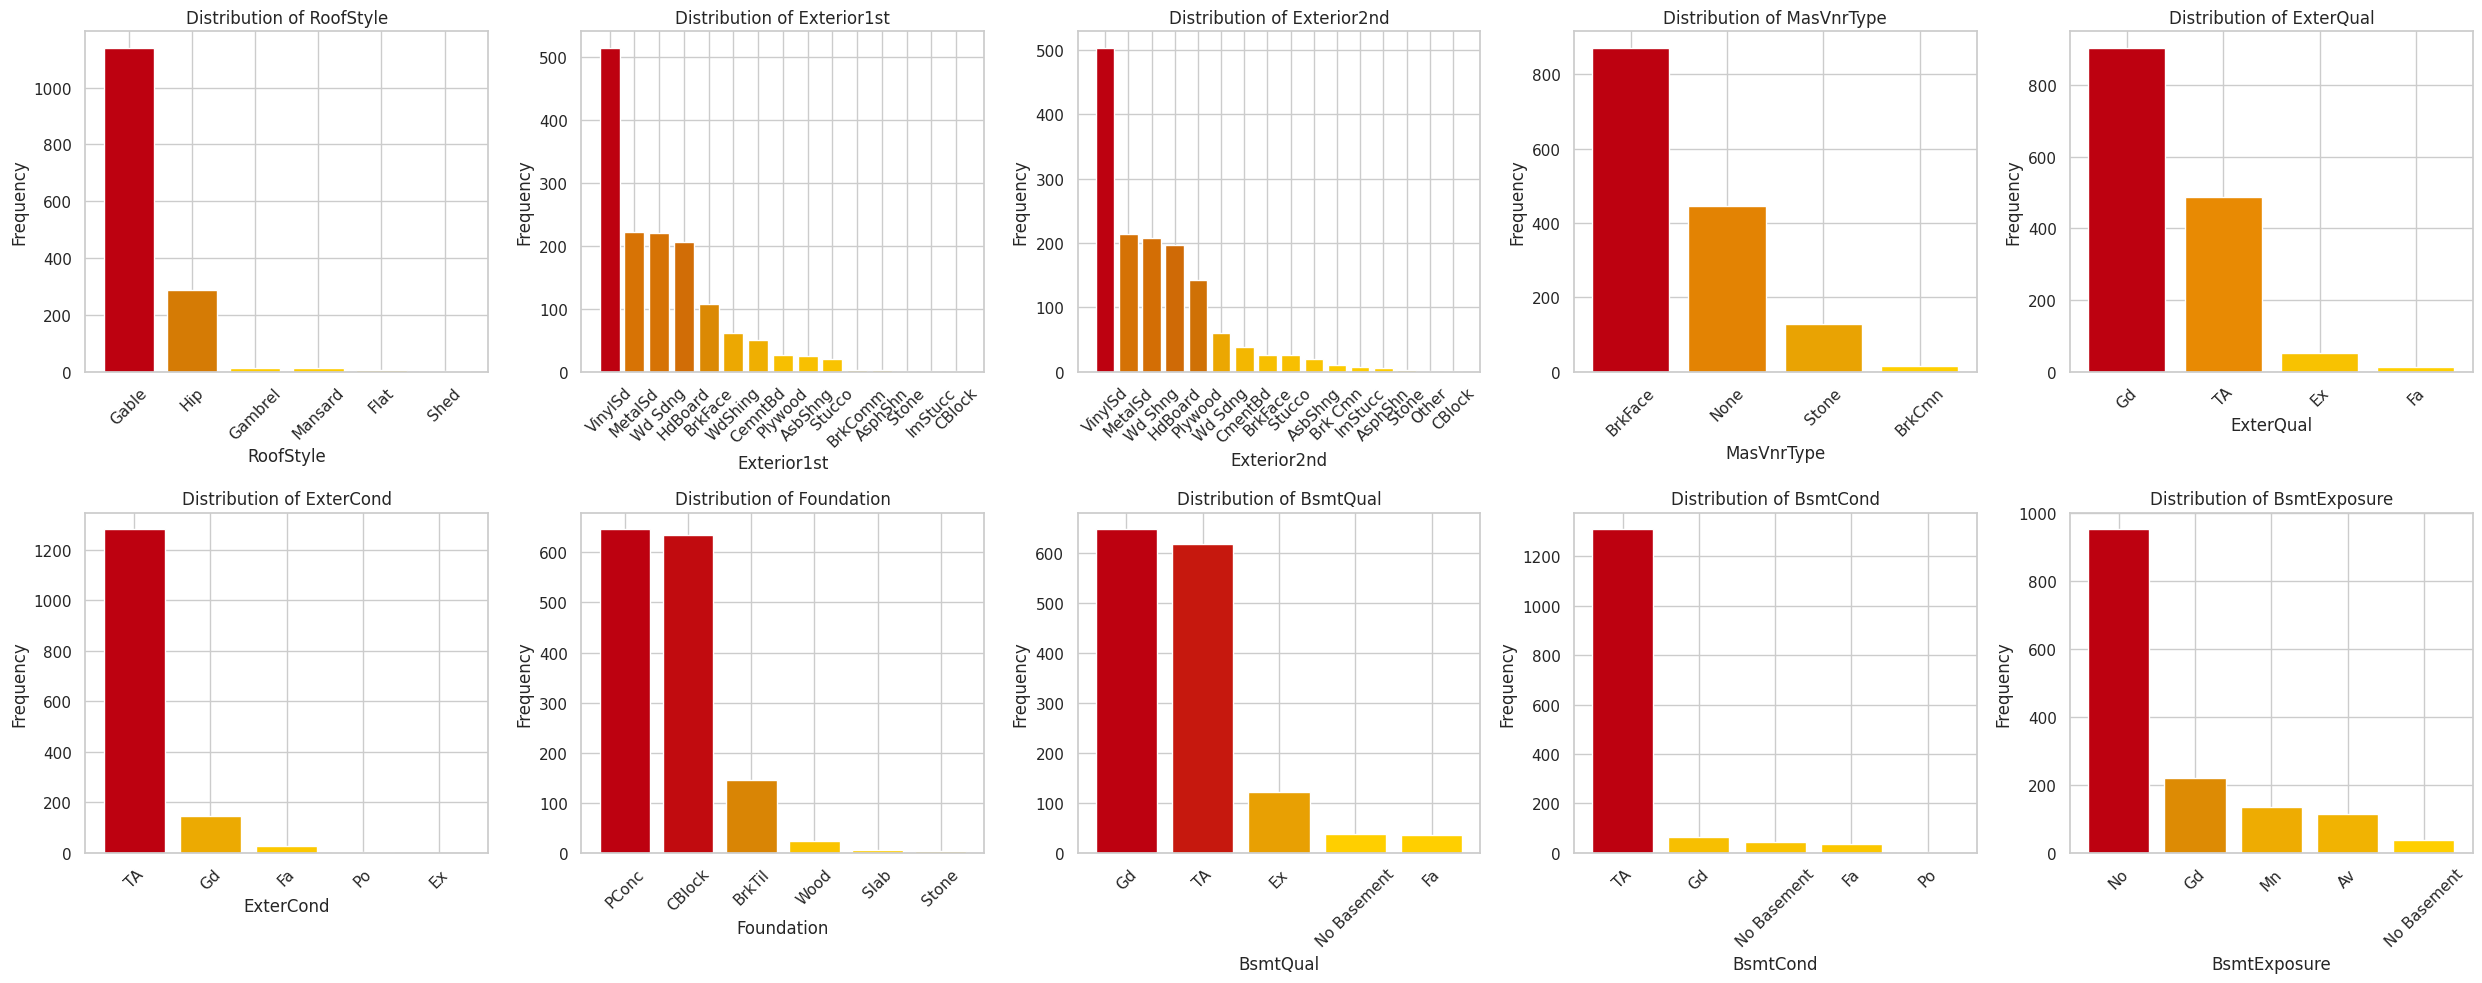

In [ ]:
import warnings
from matplotlib.colors import LinearSegmentedColormap

# filter output warnings
warnings.filterwarnings('ignore')
#  https://stackoverflow.com/questions/9134795/how-to-get-rid-of-specific-warning-messages-in-python-while-keeping-all-other-wa

# define categorical variables
bella_categorical_full = ['RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
                          'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure']

#red_gold_palette = ['#bd0110', '#FFA700', '#c65e07', '#ffcf00', '#FFA500']

# define sequential colors from red_gold_palette
red_gold = ['#ffcf00','#c65e07','#FFA700', '#bd0110']

# create sequential colormap
cmap = LinearSegmentedColormap.from_list('red_gold', red_gold)
# https://matplotlib.org/stable/gallery/color/custom_cmap.html

# create subplots for each categorical column
fig, axes = plt.subplots(2, 5, figsize=(25,10))

# flatten axes for easy iteration
axes = axes.flatten()

# loop for each categorical column and plots its respective bar graph
for i, col in enumerate(bella_categorical_full):
  counts = data_train[col].value_counts()
  labels = data_train[col].unique().astype('str')

  rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
  # https://stackoverflow.com/questions/64068659/bar-chart-in-matplotlib-using-a-colormap

  #axes[i].bar(labels, counts, color='#bd0110')
  axes[i].bar(labels,counts, color=cmap(rescale(counts)))
  # https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xticklabels(labels, rotation=45)
  # https://saturncloud.io/blog/rotate-tick-labels-in-subplot-using-pyplot-matplotlib-and-gridspec/#:~:text=Rotating%20Tick%20Labels%20with%20Matplotlib&text=To%20solve%20this%20issue%2C%20we,there%20is%20no%20more%20overlapping.

  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Feature Engineering

In [ ]:
##Creating interaction terms based on the features and knowledge
#Interaction Terms
data_train['Property_Age'] = data_train.YrSold - data_train.YearBuilt
data_test['Property_Age'] = data_test.YrSold - data_test.YearBuilt



data_train['TotalSqFt'] = data_train['1stFlrSF'] + data_train['2ndFlrSF'] + data_train['TotalBsmtSF']
data_test['TotalSqFt'] = data_test['1stFlrSF'] + data_test['2ndFlrSF'] + data_test['TotalBsmtSF']



data_train['QualityConditionInteraction'] = data_train.OverallQual * data_train.OverallCond
data_test['QualityConditionInteraction'] = data_test.OverallQual * data_test.OverallCond


data_train['OutdoorLivingSpace'] = data_train.WoodDeckSF + data_train.OpenPorchSF +data_train.EnclosedPorch + data_train['3SsnPorch'] + data_train.ScreenPorch
data_test['OutdoorLivingSpace'] = data_test.WoodDeckSF + data_test.OpenPorchSF +data_test.EnclosedPorch + data_test['3SsnPorch'] + data_test.ScreenPorch




data_train['NeighLotFrontageInt'] = data_train.groupby('Neighborhood')['LotFrontage'].transform('mean')
data_test['NeighLotFrontageInt'] = data_test.groupby('Neighborhood')['LotFrontage'].transform('mean')


data_train['Garage'] = data_train.GarageCars  * data_train.GarageArea
data_test['Garage'] = data_test.GarageCars  * data_test.GarageArea


data_train['QualAreaInteraction'] = data_train.OverallQual * data_train.LotArea
data_test['QualAreaInteraction'] = data_test.OverallQual * data_test.LotArea


<Figure size 1800x1200 with 0 Axes>

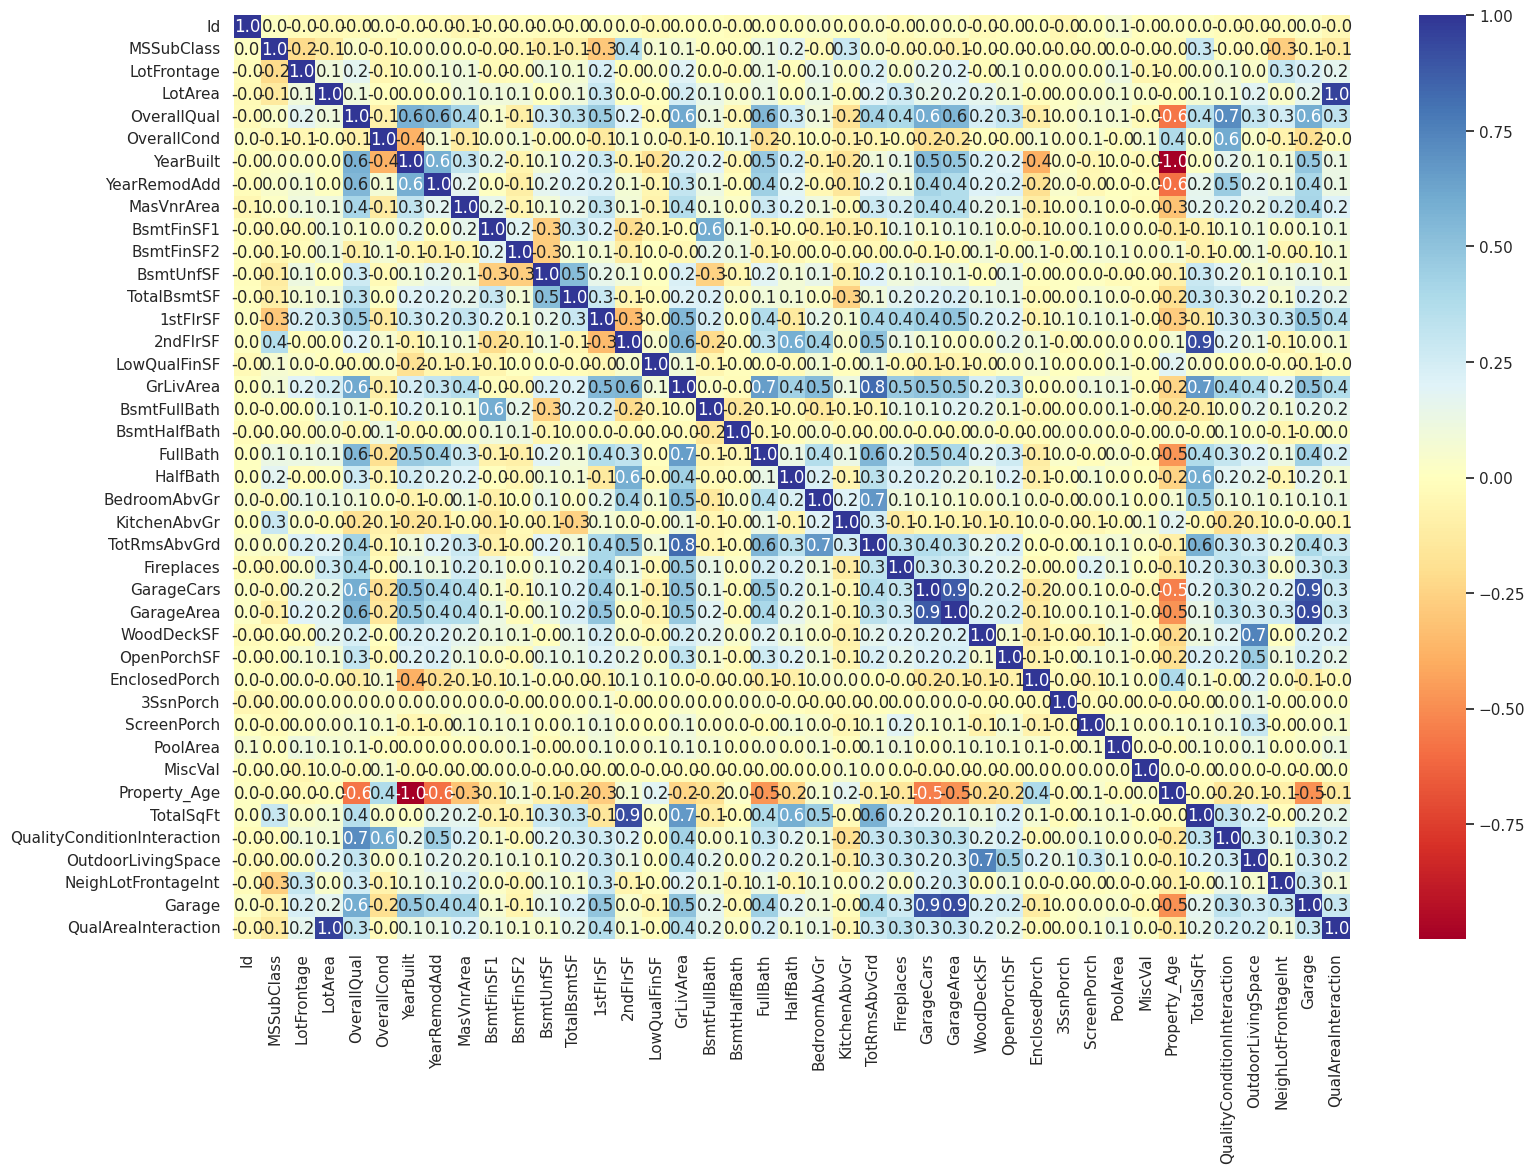

In [ ]:
#HEATMAP TRAIN DATA
#We extracted nuemrical columns to build the maps
plt.figure(figsize=(18, 12))

numerical_columns_train = [col for col in data_train.columns if data_train[col].dtype in ['int64', 'float64'] and col != 'SalePrice']
numerical_columns_test = [col for col in data_test.columns if data_test[col].dtype in ['int64', 'float64'] ]


# Setting up the figure size for the heatmap
plt.figure(figsize=(18, 12))

# Creating the heatmap using seaborn with the 'RdYlBu' colormap and annotations
sns.heatmap(data_train[numerical_columns_train].corr(), annot=True, fmt='0.1f', cmap='RdYlBu')

# Display the plot
plt.show()


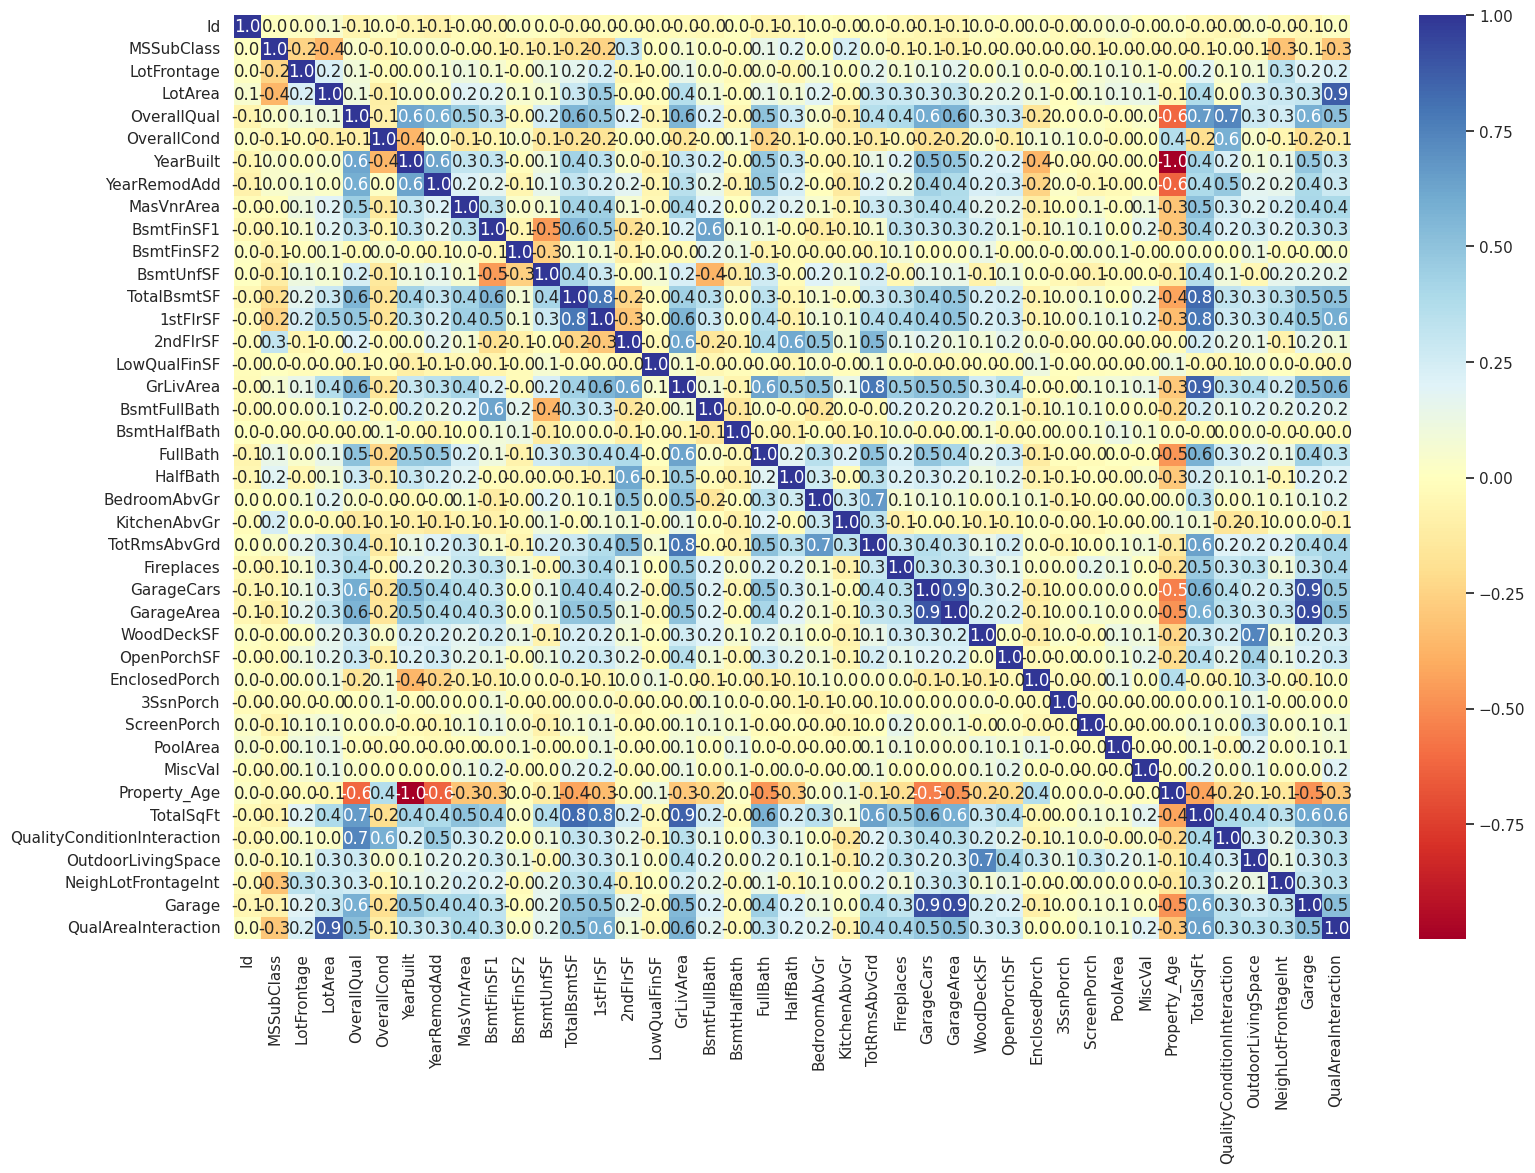

In [ ]:
# Setting up the figure size for the heatmap
plt.figure(figsize=(18, 12))

# Creating the heatmap using seaborn with the 'RdYlBu' colormap and annotations
sns.heatmap(data_test[numerical_columns_test].corr(), annot=True, fmt='0.1f', cmap='RdYlBu')

# Display the plot
plt.show()


In [ ]:
##highly correlated
## We identified numerical columns in the training and testing datasets to focus on features relevant for correlation analysis. By calculating the correlation matrices
##and extracting pairs with high correlations, weo identify and potentially address multicollinearity issues, ensuring our model's performance
import pandas as pd
import numpy as np
numerical_columns_train = [col for col in data_train.columns if data_train[col].dtype in ['int64', 'float64'] and col != 'SalePrice']
numerical_columns_test = [col for col in data_test.columns if data_test[col].dtype in ['int64', 'float64'] ]

# Assuming df is your DataFrame
# Calculate the correlation matrix
corr_matrix = data_train[numerical_columns_train].corr()

# Find the pairs with correlation greater than 0.8
high_corr_pairs = []

# Iterate over the correlation matrix and extract pairs with correlation > 0.8
for i in range(corr_matrix.shape[0]):
    for j in range(i + 1, corr_matrix.shape[1]):
        if abs(corr_matrix.iloc[i, j]) >= 0.8:
            high_corr_pairs.append((corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Convert to DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])

# Print the pairs
print(high_corr_df)

# Assuming df is your DataFrame
# Calculate the correlation matrix
corr_matrix = data_test[numerical_columns_test].corr()

# Find the pairs with correlation greater than 0.8
high_corr_pairs = []

# Iterate over the correlation matrix and extract pairs with correlation > 0.8
for i in range(corr_matrix.shape[0]):
    for j in range(i + 1, corr_matrix.shape[1]):
        if abs(corr_matrix.iloc[i, j]) >= 0.8:
            high_corr_pairs.append((corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Convert to DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])

# Print the pairs
print(high_corr_df)

     Feature1             Feature2  Correlation
0     LotArea  QualAreaInteraction     0.958230
1   YearBuilt         Property_Age    -0.999036
2    2ndFlrSF            TotalSqFt     0.926897
3   GrLivArea         TotRmsAbvGrd     0.825521
4  GarageCars           GarageArea     0.882475
5  GarageCars               Garage     0.901349
6  GarageArea               Garage     0.934233
      Feature1             Feature2  Correlation
0      LotArea  QualAreaInteraction     0.873045
1    YearBuilt         Property_Age    -0.999085
2  TotalBsmtSF            TotalSqFt     0.832676
3    GrLivArea            TotalSqFt     0.859144
4   GarageCars           GarageArea     0.897022
5   GarageCars               Garage     0.907562
6   GarageArea               Garage     0.934270


In [ ]:
##common pairs we are trying to see the common pairs, and extract them using lists
# Define the two lists of pairs
list1 = [
    ('LotArea', 'QualAreaInteraction'),
    ('YearBuilt', 'Property_Age'),
    ('TotalBsmtSF', '1stFlrSF'),
    ('TotalBsmtSF', 'TotalSqFt'),
    ('1stFlrSF', 'TotalSqFt'),
    ('GrLivArea', 'TotRmsAbvGrd'),
    ('GrLivArea', 'TotalSqFt'),
    ('GarageCars', 'GarageArea'),
    ('GarageCars', 'Garage'),
    ('GarageArea', 'Garage')
]

list2 = [
    ('LotArea', 'QualAreaInteraction'),
    ('YearBuilt', 'Property_Age'),
    ('TotalBsmtSF', 'TotalSqFt'),
    ('GrLivArea', 'TotalSqFt'),
    ('GarageCars', 'GarageArea'),
    ('GarageCars', 'Garage'),
    ('GarageArea', 'Garage')
]

# Convert the lists to sets of tuples
set1 = set(list1)
set2 = set(list2)

# Find the intersection of the two sets
common_pairs = set1.intersection(set2)

# Convert the set back to a list for easier reading (if needed)
common_pairs_list = list(common_pairs)

# Print the common pairs
print("Common pairs in both lists:")
for pair in common_pairs_list:
    print(pair)

Common pairs in both lists:
('GarageCars', 'Garage')
('LotArea', 'QualAreaInteraction')
('TotalBsmtSF', 'TotalSqFt')
('GarageArea', 'Garage')
('GrLivArea', 'TotalSqFt')
('GarageCars', 'GarageArea')
('YearBuilt', 'Property_Age')


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
##we used feature imporatnce to see out of the pair which is more important to the model
##Using RandomForest we see the variable importance and keep the variable with high value
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
correlated_pairs = common_pairs_list

# Function to calculate feature importances for each pair
def calculate_feature_importances(data, pairs):
    results = {}
    for feature1, feature2 in pairs:
        X = data[[feature1, feature2]]
        y = data['SalePrice']

        X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Feature importances
        importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
        sorted_importances = importances.sort_values(by='Importance', ascending=False)

        # Store the results
        results[(feature1, feature2)] = sorted_importances

    return results

# Assuming data_train is your DataFrame
feature_importance_results = calculate_feature_importances(data_train, correlated_pairs)

# Print the feature importances for each pair
for (feature1, feature2), importances in feature_importance_results.items():
    print(f'Feature importances for pair: {feature1} and {feature2}')
    print(importances)
    print()

Feature importances for pair: GarageCars and Garage
      Feature  Importance
1      Garage    0.732897
0  GarageCars    0.267103

Feature importances for pair: LotArea and QualAreaInteraction
               Feature  Importance
1  QualAreaInteraction    0.724497
0              LotArea    0.275503

Feature importances for pair: TotalBsmtSF and TotalSqFt
       Feature  Importance
1    TotalSqFt    0.518302
0  TotalBsmtSF    0.481698

Feature importances for pair: GarageArea and Garage
      Feature  Importance
1      Garage    0.779108
0  GarageArea    0.220892

Feature importances for pair: GrLivArea and TotalSqFt
     Feature  Importance
0  GrLivArea    0.575317
1  TotalSqFt    0.424683

Feature importances for pair: GarageCars and GarageArea
      Feature  Importance
0  GarageCars    0.561357
1  GarageArea    0.438643

Feature importances for pair: YearBuilt and Property_Age
        Feature  Importance
1  Property_Age     0.57491
0     YearBuilt     0.42509



In [ ]:
##Dropping the less important feature

data_train = data_train.drop('LotArea', axis=1)
data_test = data_test.drop('LotArea', axis=1)
data_train = data_train.drop('YearBuilt', axis=1)
data_test = data_test.drop('YearBuilt', axis=1)
data_train = data_train.drop('TotalBsmtSF', axis=1)
data_test = data_test.drop('TotalBsmtSF', axis=1)
data_train = data_train.drop('GarageArea', axis=1)
data_test = data_test.drop('GarageArea', axis=1)
data_train = data_train.drop('GrLivArea', axis=1)
data_test = data_test.drop('GrLivArea', axis=1)
data_train = data_train.drop('GarageCars', axis=1)
data_test = data_test.drop('GarageCars', axis=1)

In [ ]:
# Our goal is to prepare the data by handling missing values, scaling numerical features, and encoding categorical variables, ensuring that the datasets are ready for model training and evaluation.
# Import necessary libraries
import pandas as pd
#https://pandas.pydata.org/docs/getting_started/install.html
import numpy as np
#https://numpy.org/doc/stable/user/absolute_beginners.html
from sklearn.model_selection import train_test_split
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.compose import ColumnTransformer
#https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
from sklearn.pipeline import Pipeline
#https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn.impute import SimpleImputer
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Ensure consistent data types for categorical columns
def ensure_consistent_types(df, categorical_features):
    for col in categorical_features:
        df[col] = df[col].astype(str)
    return df

# Data Preprocessing Function
def preprocess_data(data_train, data_test):
    # Separate target variable from training data
    y = np.log(data_train['SalePrice'])  # Log-transform the target variable
    X_train = data_train.drop('SalePrice', axis=1)
    X_test = data_test.copy()

    # Identify numerical and categorical columns
    numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train.select_dtypes(include=['object']).columns

    # Ensure all categorical features have consistent types in both datasets
    X_train = ensure_consistent_types(X_train, categorical_features)
    X_test = ensure_consistent_types(X_test, categorical_features)

    # Define preprocessing steps
    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    # Combine the transformers into a single preprocessing step
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    # Apply preprocessing to train and test datasets separately
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    return X_train_processed, y, X_test_processed

# Example usage
X_train_processed, y_train, X_test_processed = preprocess_data(data_train, data_test)

##Data Splitting

In [ ]:
X_train_final, X_valid, y_train_final, y_valid = train_test_split( X_train_processed, y_train, test_size=0.2, random_state=42)

##Model Building

In [ ]:
# Ridge Regression
import numpy as np
from sklearn.linear_model import Ridge
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
from sklearn.metrics import mean_squared_error
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# Build and Train the Ridge Regression Model
ridge_model = Ridge(alpha=0.1, random_state=42)  # You can adjust alpha for regularization strength
ridge_model.fit(X_train_final, y_train_final)

# Predict  on train
y_train_pred = ridge_model.predict(X_train_final)
train_rmse_r = np.sqrt(mean_squared_error(y_train_final, y_train_pred))
print(f'RMSE on training data: {train_rmse_r}')


# Predict on the valid set
predictions = ridge_model.predict(X_valid)
valid_rmse_r = np.sqrt(mean_squared_error(y_valid, predictions))
print(f'RMSE on valid data: {valid_rmse_r}')

# Final Predictions and Submission
final_predictions = ridge_model.predict(X_test_processed)
final_predictions = np.exp(final_predictions)
final_predictions # Inverse log-transform to get actual SalePrice
submission_ridge = pd.DataFrame({'Id': data_test['Id'], 'SalePrice': final_predictions})

RMSE on training data: 0.12488110280158735
RMSE on valid data: 0.1446240011733382


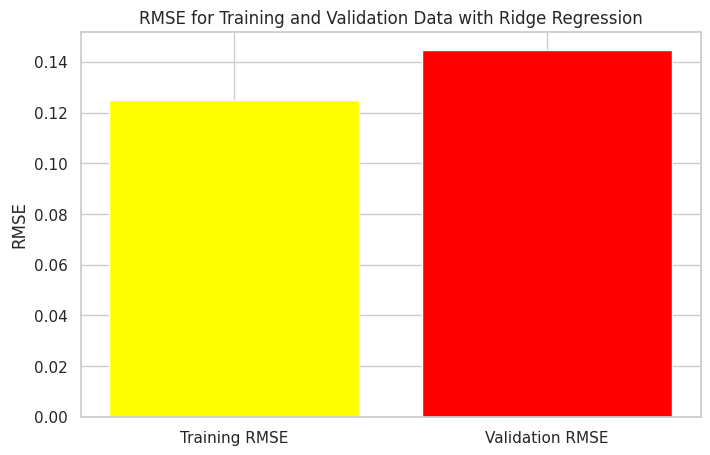

In [ ]:
####Model Evaluation Ridge Regression
# Plot RMSE
rmse_values = [train_rmse_r, valid_rmse_r]
labels = ['Training RMSE', 'Validation RMSE']

plt.figure(figsize=(8, 5))
plt.bar(labels, rmse_values, color=['yellow', 'red'])
plt.ylabel('RMSE')
plt.title('RMSE for Training and Validation Data with Ridge Regression')
plt.show()

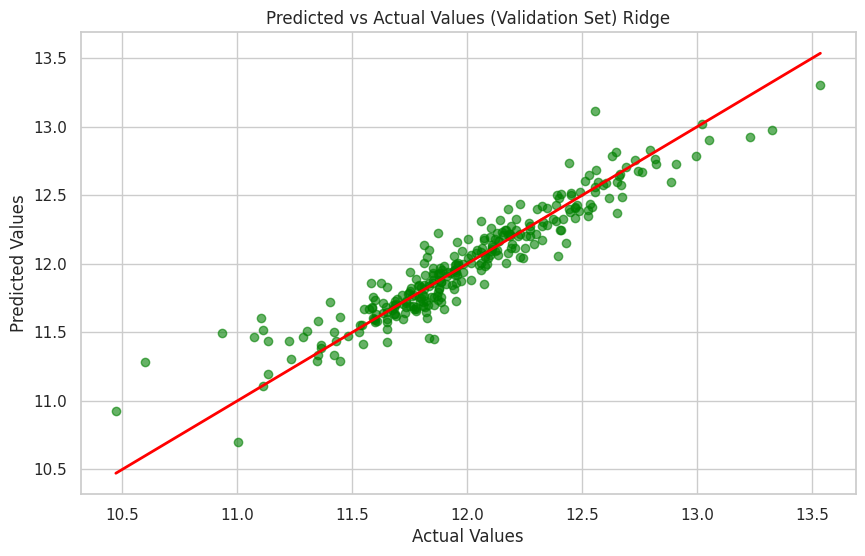

In [ ]:
# Plot Predicted vs Actual Values for Validation Set
#The entire block of code creates a scatter plot comparing the actual values with the predicted values for the validation set.
#The green points represent the predicted values versus the actual values,
#while the red line indicates where the predicted values perfectly match the actual values.
# This plot helps visualize how well the model's predictions align with the actual outcomes.
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, predictions, alpha=0.6, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Validation Set) Ridge')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', lw=2)
plt.show()

In [ ]:
#LASSO model, different parameters used to try and lower rmse
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
#https://machinelearningmastery.com/lasso-regression-with-python/
#https://www.30secondsofcode.org/python/s/key-of-min-max/ minium of dictionary

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt

#while loop to range over various alpha values
starting_alpha = 0.0001
alphas = []
rmse_vals = {}
while starting_alpha <= 1:
  lasso_model = Lasso(alpha= starting_alpha, warm_start=True, max_iter=100000, selection='random')

  lasso_model.fit(X_train_final, y_train_final)

  predictions = lasso_model.predict(X_valid)
  rmse_train = np.sqrt(mean_squared_error(y_valid, predictions))
  rmse_vals[starting_alpha] = rmse_train

  starting_alpha += 0.09

for alpha, rmse in rmse_vals.items():
    print(f'alpha:{alpha}, rmse: {rmse}')

#find best alpha
best_alpha = min(rmse_vals, key= rmse_vals.get)
best_rmse = rmse_vals[best_alpha]

#train model with new best alpha
lasso_model = Lasso(alpha=best_alpha, warm_start=True, max_iter=100000, selection='random')  # You can adjust alpha for regularization strength
lasso_model.fit(X_train_final, y_train_final)


#predict on train
y_train_pred = lasso_model.predict(X_train_final)
train_rmse_l = np.sqrt(mean_squared_error(y_train_final, y_train_pred))
print(f'RMSE on training data: {train_rmse_l}')


#predict on valid
y_valid_pred = lasso_model.predict(X_valid)
valid_rmse_l = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
print(f'RMSE on valid data: {valid_rmse_l}')

final_predictions = lasso_model.predict(X_test_processed)
final_predictions = np.exp(final_predictions)
final_predictions # Inverse log-transform to get actual SalePrice
submission_lasso = pd.DataFrame({'Id': data_test['Id'], 'SalePrice': final_predictions})

alpha:0.0001, rmse: 0.14151899064032372
alpha:0.0901, rmse: 0.2373800836214812
alpha:0.18009999999999998, rmse: 0.3215534025926209
alpha:0.2701, rmse: 0.3959945234882416
alpha:0.3601, rmse: 0.43324686081152136
alpha:0.45009999999999994, rmse: 0.43324686081152136
alpha:0.5400999999999999, rmse: 0.43324686081152136
alpha:0.6300999999999999, rmse: 0.43324686081152136
alpha:0.7200999999999999, rmse: 0.43324686081152136
alpha:0.8100999999999998, rmse: 0.43324686081152136
alpha:0.9000999999999998, rmse: 0.43324686081152136
alpha:0.9900999999999998, rmse: 0.43324686081152136
RMSE on training data: 0.12541828438717992
RMSE on valid data: 0.14145717765039725


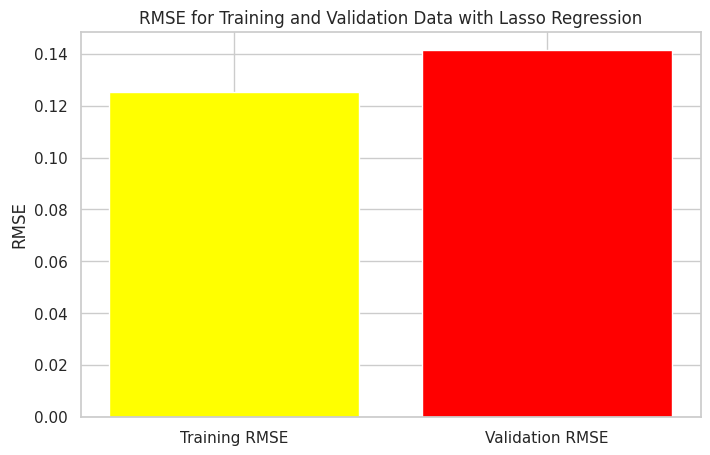

In [ ]:
####Model Evaluation Lasso
# Plot RMSE
rmse_values = [train_rmse_l, valid_rmse_l]
labels = ['Training RMSE', 'Validation RMSE']

plt.figure(figsize=(8, 5))
plt.bar(labels, rmse_values, color=['yellow', 'red'])
plt.ylabel('RMSE')
plt.title('RMSE for Training and Validation Data with Lasso Regression')
plt.show()

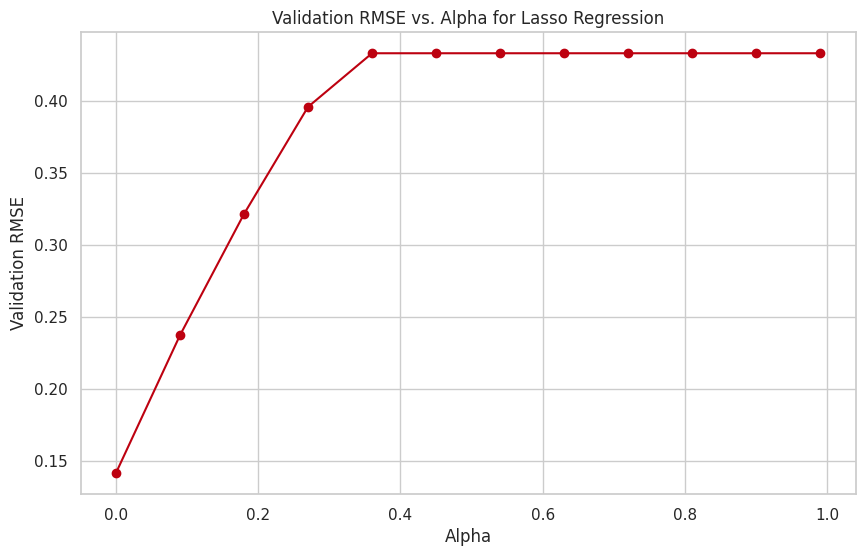

In [ ]:
# Plotting the RMSE values
# Plotting RMSE values
##The purpose of this graph is to visualize the effect of the regularization parameter (alpha) on the model's performance,
## specifically measured by the Root Mean Squared Error (RMSE) on the validation set.
alphas = list(rmse_vals.keys())
rmses = list(rmse_vals.values())

plt.figure(figsize=(10, 6))
plt.plot(alphas, rmses, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Validation RMSE')
plt.title('Validation RMSE vs. Alpha for Lasso Regression')
plt.grid(True)
plt.show()

In [ ]:
# SVR
# SVR from https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Train the Support Vector Regression Model
svr_model = SVR(kernel='rbf', C=100, gamma='auto')
svr_model.fit(X_train_final, y_train_final)

# Predict on training set to evaluate the model
y_pred_train_svr = svr_model.predict(X_train_final)
train_rmse_svr = np.sqrt(mean_squared_error(y_train_final, y_pred_train_svr))
print(f'SVR Training RMSE: {train_rmse_svr}')
# Predict on the valid set
predictions_svr = svr_model.predict(X_valid)
valid_rmse_svr = np.sqrt(mean_squared_error(y_valid, predictions_svr))
print(f'RMSE on valid data: {valid_rmse_svr}')

# Final Predictions and Submission
final_predictions_svr = svr_model.predict(X_test_processed)
final_predictions_svr = np.exp(final_predictions_svr) # Inverse log-transform to get actual SalePrice
submission_svr= pd.DataFrame({'Id': data_test['Id'], 'SalePrice': final_predictions_svr})

SVR Training RMSE: 0.07726099396955181
RMSE on valid data: 0.16332514568324108


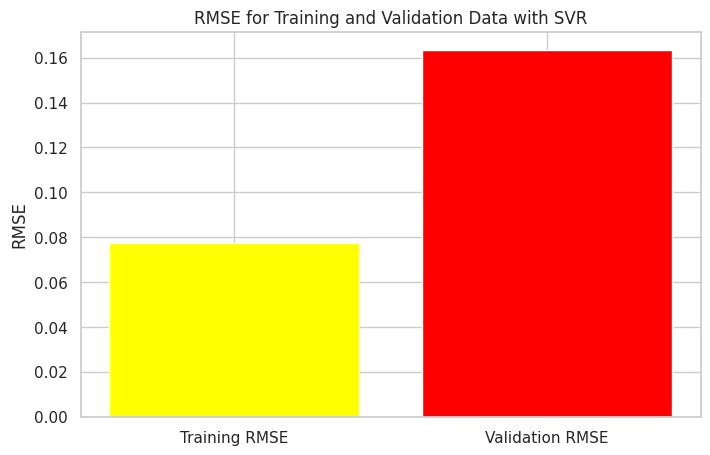

In [ ]:
##MODEL EVALUATION  SVR
# Plot RMSE
rmse_values = [train_rmse_svr, valid_rmse_svr]
labels = ['Training RMSE', 'Validation RMSE']

plt.figure(figsize=(8, 5))
plt.bar(labels, rmse_values, color=['yellow', 'red'])
plt.ylabel('RMSE')
plt.title('RMSE for Training and Validation Data with SVR')
plt.show()

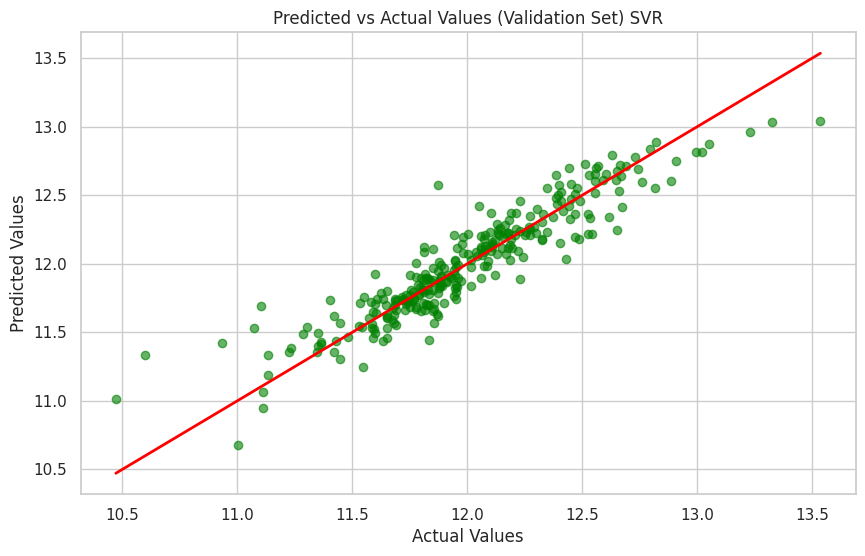

In [ ]:
# Plot Predicted vs Actual Values for Validation Set
#The entire block of code creates a scatter plot comparing the actual values with the predicted values for the validation set.
#The green points represent the predicted values versus the actual values,
#while the red line indicates where the predicted values perfectly match the actual values.
# This plot helps visualize how well the model's predictions align with the actual outcomes.
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, predictions_svr, alpha=0.6, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Validation Set) SVR')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', lw=2)
plt.show()

In [ ]:
#Random forest
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.ensemble import RandomForestRegressor
sqrt_features = int(np.sqrt(X_train_final.shape[1]))
# Build and Train the Random Forest Regression Model
rf_model = RandomForestRegressor(
    n_estimators=3500,    # Number of trees in the forest
    min_weight_fraction_leaf=0.0,
    random_state=42,     # Seed for random number generation
    max_depth=70,        # Maximum depth of the trees
    min_samples_split=2, # Minimum number of samples required to split a node
    min_samples_leaf=1,  # Minimum number of samples required at each leaf node
    max_features=sqrt_features, # Number of features to consider when looking for the best split
)
rf_model.fit(X_train_final, y_train_final)

# Predict  on train
y_train_pred = rf_model.predict(X_train_final)
train_rmse = np.sqrt(mean_squared_error(y_train_final, y_train_pred))
print(f'RMSE on training data: {train_rmse}')


# Predict on the valid set
predictions = rf_model.predict(X_valid)
valid_rmse = np.sqrt(mean_squared_error(y_valid, predictions))
print(f'RMSE on valid data: {valid_rmse}')

# Final Predictions and Submission
final_predictions = rf_model.predict(X_test_processed)
final_predictions = np.exp(final_predictions) ##https://numpy.org/doc/stable/reference/generated/numpy.exp.html
final_predictions # Inverse log-transform to get actual SalePrice
submission_rf = pd.DataFrame({'Id': data_test['Id'], 'SalePrice': final_predictions})



RMSE on training data: 0.050538255668540935
RMSE on valid data: 0.15094163508627323


In [ ]:
##Random forest cross validation
from sklearn.model_selection import cross_val_score

# Define the RandomForestRegressor model with the chosen hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=1500,
    min_weight_fraction_leaf=0,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=sqrt_features,
    random_state=42
)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_final, y_train_final, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the cross-validation RMSE scores
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))
print("Standard Deviation of RMSE:", np.std(cv_rmse_scores))

# Fit the model on the entire training data
rf_model.fit(X_train_final, y_train_final)

# Predict on the valid set
predictions_rf = rf_model.predict(X_valid)
valid_rmse = np.sqrt(mean_squared_error(y_valid, predictions_rf))
print(f'RMSE on valid data: {valid_rmse}')

# Final Predictions and Submission
final_predictions = rf_model.predict(X_test_processed)
final_predictions = np.exp(final_predictions) ##https://numpy.org/doc/stable/reference/generated/numpy.exp.html
final_predictions # Inverse log-transform to get actual SalePrice
submission_rf = pd.DataFrame({'Id': data_test['Id'], 'SalePrice': final_predictions})


Cross-Validation RMSE Scores: [0.13266363 0.14744861 0.17142059 0.13048158 0.11981608]
Mean RMSE: 0.14036610007785782
Standard Deviation of RMSE: 0.017854288726633468
RMSE on valid data: 0.15467532503636136


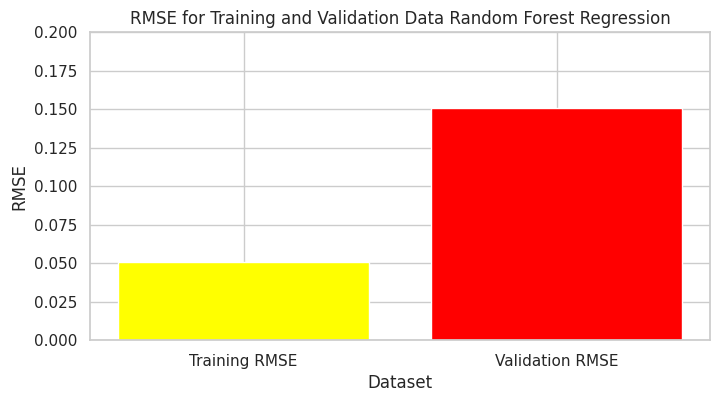

In [ ]:
##model evaluation
# Random Forest RMSE Visualization
train_rmse = 0.050538255668540935
valid_rmse = 0.15094163508627323

labels = ['Training RMSE', 'Validation RMSE']

rmse_values = [train_rmse, valid_rmse]

# Create bar plot
plt.figure(figsize=(8, 4))  # Set figure size
plt.bar(labels, rmse_values, color=['yellow', 'red'])  # Bar plot
plt.xlabel('Dataset')  # Label for the x-axis
plt.ylabel('RMSE')  # Label for the y-axis
plt.title('RMSE for Training and Validation Data Random Forest Regression')  # Title of the plot
plt.ylim(0, 0.2)  # Set y-axis limit to make differences more visible
plt.show()

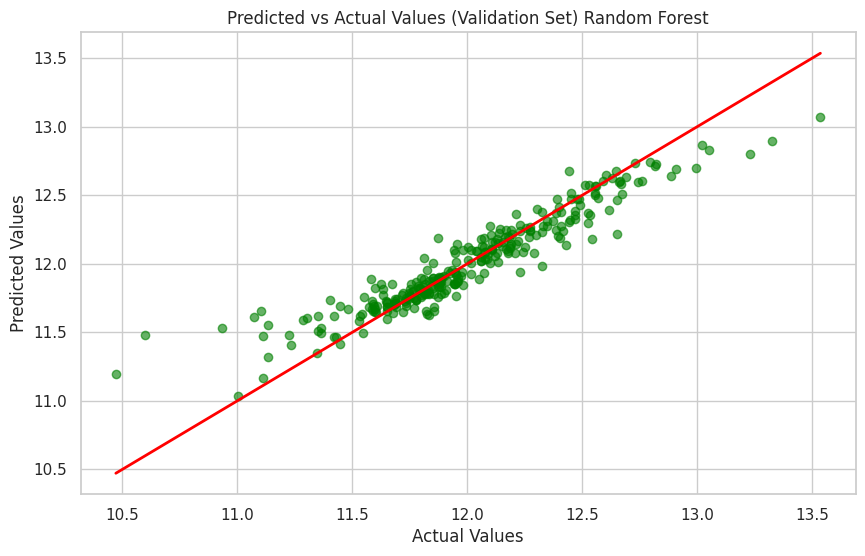

In [ ]:
# Plot Predicted vs Actual Values for Validation Set
#The entire block of code creates a scatter plot comparing the actual values with the predicted values for the validation set.
#The green points represent the predicted values versus the actual values,
#while the red line indicates where the predicted values perfectly match the actual values.
# This plot helps visualize how well the model's predictions align with the actual outcomes.
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, predictions_rf, alpha=0.6, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Validation Set) Random Forest')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', lw=2)
plt.show()

In [ ]:
#CATBOOST REGRESSION
#https://medium.com/@alakhsharmacs/understanding-catboost-regression-for-predictive-modeling-4d4568c1642b#:~:text=CatBoost%20is%20a%20powerful%20and,to%20predict%20a%20continuous%20variable
#https://catboost.ai/en/docs/installation/python-installation-method-pip-install
!pip install catboost


In [ ]:
#In this code, we're using CatBoostRegressor, a cutting-edge machine learning technique,
#to predict outcomes based on our data. CatBoost stands out for its ability to handle complex datasets,
# including categorical variables, without the need for extensive preprocessing.
#By tweaking parameters like the number of learning rounds and the depth of understanding,
#we optimize how our model learns from the data. After training it with our prepared training data,
#we test its performance on both the training to ensure a low RMSE on training.
#Finally, we use its to make predictions on testing data.

#https://catboost.ai/en/docs/concepts/python-usages-examples
from catboost import CatBoostRegressor
## CatBoost
# Import CatBoostRegressor from the CatBoost library
from catboost import CatBoostRegressor
#https://catboost.ai/en/docs/concepts/python-reference_catboostregressor
# Initialize the CatBoostRegressor model with specified hyperparameters
cat_model = CatBoostRegressor(
    iterations=2000,            # Number of boosting iterations (trees) to be run
    learning_rate=0.03,         # Learning rate for gradient boosting
    depth=4,                    # Depth of the trees (maximum depth of a single tree)
    loss_function='RMSE',       # Loss function to optimize during training (Root Mean Squared Error)
    eval_metric='RMSE',         # Metric used for evaluation during training (Root Mean Squared Error)
    random_seed=42,             # Seed for reproducibility of results
    verbose=100,                # Print training progress every 100 iterations
    l2_leaf_reg=1.5,             # L2 regularization coefficient for leaf weights
)

# Fit the CatBoost model using the preprocessed training data
cat_model.fit(X_train_final, y_train_final)
# Predict the target variable on the training set
y_train_pred_cat = cat_model.predict(X_train_final)
# Calculate the Root Mean Squared Error (RMSE) for the training set predictions
train_rmse_cat = np.sqrt(mean_squared_error(y_train_final, y_train_pred_cat))
print(f'CatBoost Regression Training RMSE: {train_rmse_cat}')

# Predict the target variable on the valid set
predictions_cat = cat_model.predict(X_valid)
valid_rmse_cat = np.sqrt(mean_squared_error(y_valid, predictions_cat))
print(f'RMSE on valid data: {valid_rmse_cat}')

# Final Predictions and Submission
final_predictions_cat = cat_model.predict(X_test_processed)
final_predictions_cat = np.exp(final_predictions_cat)  # Inverse log-transform to get actual SalePrice #https://numpy.org/doc/stable/reference/generated/numpy.exp.html
submission_cat = pd.DataFrame({'Id': data_test['Id'], 'SalePrice': final_predictions_cat})



0:	learn: 0.3831076	total: 11.5ms	remaining: 23s
100:	learn: 0.1458714	total: 325ms	remaining: 6.11s
200:	learn: 0.1178064	total: 1.08s	remaining: 9.67s
300:	learn: 0.1053491	total: 1.61s	remaining: 9.1s
400:	learn: 0.0962048	total: 1.82s	remaining: 7.28s
500:	learn: 0.0888303	total: 2.01s	remaining: 6s
600:	learn: 0.0831684	total: 2.42s	remaining: 5.63s
700:	learn: 0.0781066	total: 2.65s	remaining: 4.92s
800:	learn: 0.0735827	total: 2.87s	remaining: 4.3s
900:	learn: 0.0693861	total: 3.25s	remaining: 3.97s
1000:	learn: 0.0656914	total: 3.81s	remaining: 3.8s
1100:	learn: 0.0624968	total: 4.37s	remaining: 3.57s
1200:	learn: 0.0597460	total: 4.92s	remaining: 3.27s
1300:	learn: 0.0571108	total: 5.29s	remaining: 2.84s
1400:	learn: 0.0545837	total: 5.67s	remaining: 2.43s
1500:	learn: 0.0524523	total: 6.24s	remaining: 2.07s
1600:	learn: 0.0503278	total: 6.8s	remaining: 1.7s
1700:	learn: 0.0482845	total: 7.35s	remaining: 1.29s
1800:	learn: 0.0462861	total: 7.9s	remaining: 873ms
1900:	learn: 0.

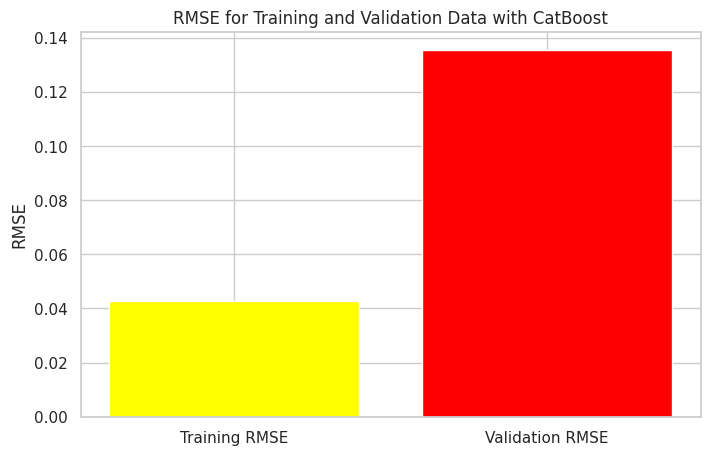

In [ ]:
##MODEL EVALUATION CATBOOST
# Plot RMSE
rmse_values = [train_rmse_cat, valid_rmse_cat]
labels = ['Training RMSE', 'Validation RMSE']

plt.figure(figsize=(8, 5))
plt.bar(labels, rmse_values, color=['yellow', 'red'])
plt.ylabel('RMSE')
plt.title('RMSE for Training and Validation Data with CatBoost')
plt.show()

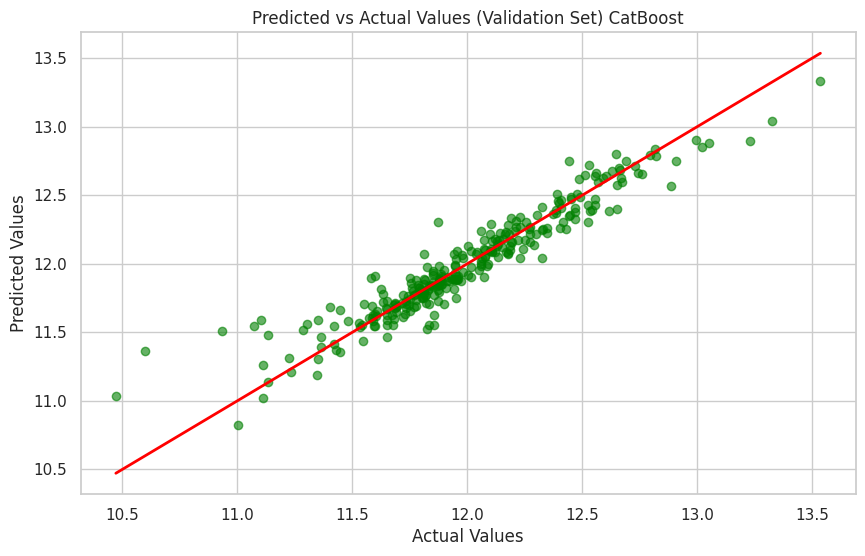

In [ ]:
# Plot Predicted vs Actual Values for Validation Set
#The entire block of code creates a scatter plot comparing the actual values with the predicted values for the validation set.
#The green points represent the predicted values versus the actual values,
#while the red line indicates where the predicted values perfectly match the actual values.
# This plot helps visualize how well the model's predictions align with the actual outcomes.
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, predictions_cat, alpha=0.6, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Validation Set) CatBoost')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', lw=2)
plt.show()

In [ ]:
##STACKING MODELS
#https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html
##STACKING MODELS
#https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html
import numpy as np
from sklearn.ensemble import RandomForestRegressor,  StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

base_models = [
    ('ridge', ridge_model),
    ('random_forest', rf_model),
]

# Meta-model
meta_model = CatBoostRegressor()

# Stacking Regressor
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking model
stacked_model.fit(X_train_final, y_train_final)

# Predict the target variable on the training set
y_train_pred_stack = stacked_model.predict(X_train_final)
# Calculate the Root Mean Squared Error (RMSE) for the training set predictions
train_rmse_stack = np.sqrt(mean_squared_error(y_train_final, y_train_pred_stack))
print(f'Stacked Regression Training RMSE: {train_rmse_stack}')

# Predict the target variable on the valid set
predictions_stack = stacked_model.predict(X_valid)
valid_rmse_stack = np.sqrt(mean_squared_error(y_valid, predictions_stack))
print(f'RMSE on valid data: {valid_rmse_stack}')

# Final Predictions and Submission
final_predictions_stack = stacked_model.predict(X_test_processed)
final_predictions_stack = np.exp(final_predictions_stack)  # Inverse log-transform to get actual SalePrice #https://numpy.org/doc/stable/reference/generated/numpy.exp.html
submission_stack = pd.DataFrame({'Id': data_test['Id'], 'SalePrice': final_predictions_stack})



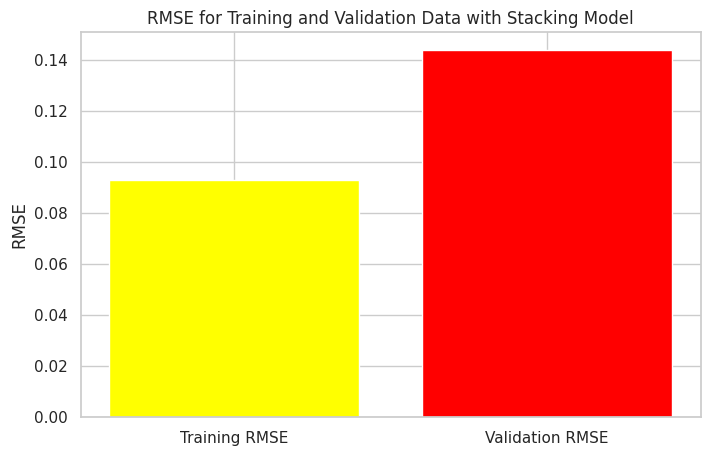

In [ ]:
##MODEL EVALUATION
##MODEL EVALUATION
# Plot RMSE
rmse_values = [train_rmse_stack, valid_rmse_stack]
labels = ['Training RMSE', 'Validation RMSE']

plt.figure(figsize=(8, 5))
plt.bar(labels, rmse_values, color=['yellow', 'red'])
plt.ylabel('RMSE')
plt.title('RMSE for Training and Validation Data with Stacking Model')
plt.show()

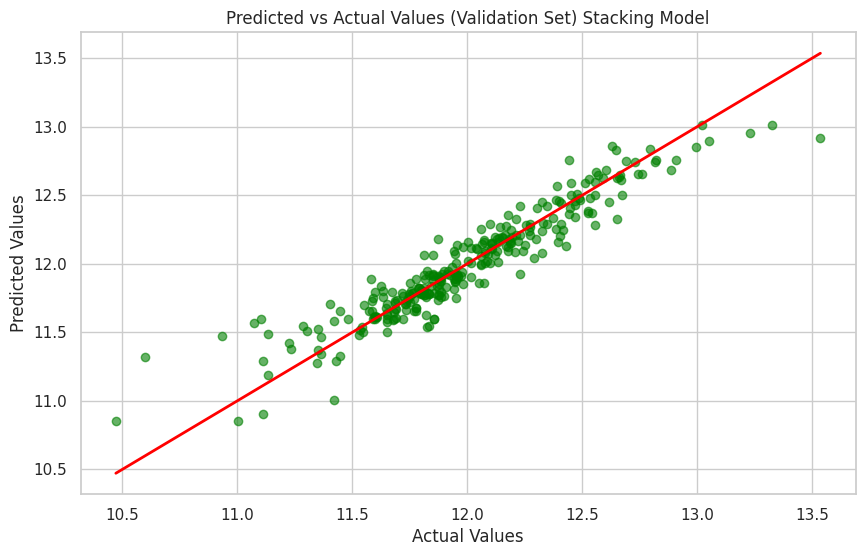

In [ ]:
# Plot Predicted vs Actual Values for Validation Set
#The code creates a scatter plot comparing the actual values with the predicted values for the validation set.
#The green points represent the predicted values versus the actual values,
#while the red line indicates where the predicted values perfectly match the actual values.
# This plot helps visualize how well the model's predictions align with the actual outcomes.
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, predictions_stack, alpha=0.6, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Validation Set) Stacking Model')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', lw=2)
plt.show()

In [ ]:
!pip install xgboost # https://xgboost.readthedocs.io/en/stable/install.html#python

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
# Define additional hyperparameters to tune
params = {
    'min_child_weight': 5,          # Minimum sum of instance weight (hessian) needed in a child
    'gamma': 0.2,                     # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'subsample': 0.8,               # Subsample ratio of the training instances
    'colsample_bytree': 0.8,        # Subsample ratio of columns when constructing each tree
    'reg_alpha': 0.01,              # L1 regularization term on weights
    'reg_lambda': 0.001,                # L2 regularization term on weights
    'random_state': 42              # Seed for reproducibility of results
}

# Merge the base parameters with additional parameters
xgboost_params = {**params, **{
    'n_estimators': 3000,           # Number of boosting iterations (trees) to be run
    'max_depth': 4,                # Maximum depth of the trees (maximum depth of a single tree)
    'learning_rate': 0.002,          # Learning rate for gradient boosting
    'objective': 'reg:squarederror' # Objective function (squared error for regression)
}}

# Initialize the XGBRegressor model with specified hyperparameters
xgboost_model = XGBRegressor(**xgboost_params)
# Perform cross-validation
cv_scores = cross_val_score(xgboost_model, X_train_final, y_train_final, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the cross-validation RMSE scores
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))
print("Standard Deviation of RMSE:", np.std(cv_rmse_scores))

# Fit the model on the entire training data
xgboost_model.fit(X_train_final, y_train_final)
# Predict the target variable on the training set
y_train_pred_xgboost = xgboost_model.predict(X_train_final)
# Calculate the Root Mean Squared Error (RMSE) for the training set predictions
train_rmse_xgboost = np.sqrt(mean_squared_error(y_train_final, y_train_pred_xgboost))
print(f'XGBoost Regression Training RMSE: {train_rmse_xgboost}')

# Predict on the valid set
predictions_xgboost_v = xgboost_model.predict(X_valid)
# Calculate the Root Mean Squared Error (RMSE) for the training set predictions
valid_rmse_xgboost = np.sqrt(mean_squared_error(y_valid, predictions_xgboost_v))
print(f'XGBoost Regression VALIDATION RMSE: {valid_rmse_xgboost}')

# Predict the target variable on the test set
predictions_xgboost = xgboost_model.predict(X_test_processed)
# Inverse log-transform the predictions to get actual SalePrice values
final_predictions_xgboost = np.exp(predictions_xgboost)
# Create a DataFrame for submission with Id and SalePrice columns
submission_xgboost_params = pd.DataFrame({'Id': data_test['Id'], 'SalePrice': final_predictions_xgboost})


Cross-Validation RMSE Scores: [0.13468962 0.14757879 0.17108357 0.13050522 0.11979591]
Mean RMSE: 0.1407306224272047
Standard Deviation of RMSE: 0.017592691476921978
XGBoost Regression Training RMSE: 0.10287110868599329
XGBoost Regression VALIDATION RMSE: 0.14442919504597954


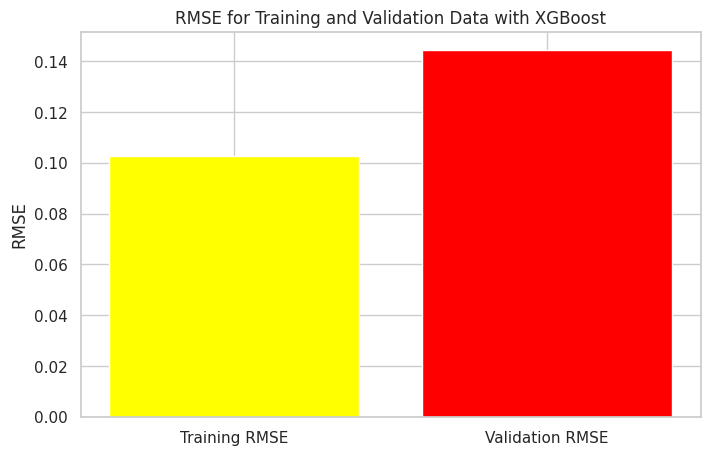

In [ ]:
##model evaluation
rmse_values = [train_rmse_xgboost, valid_rmse_xgboost]
labels = ['Training RMSE', 'Validation RMSE']

plt.figure(figsize=(8, 5))
plt.bar(labels, rmse_values, color=['yellow', 'red'])
plt.ylabel('RMSE')
plt.title('RMSE for Training and Validation Data with XGBoost')
plt.show()

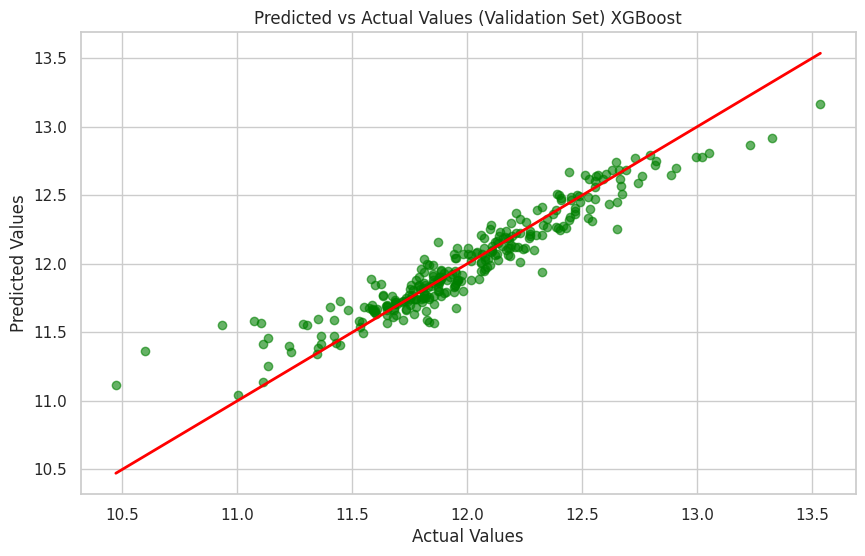

In [ ]:
# Plot Predicted vs Actual Values for Validation Set
#The  code creates a scatter plot comparing the actual values with the predicted values for the validation set.
#The green points represent the predicted values versus the actual values,
#while the red line indicates where the predicted values perfectly match the actual values.
# This plot helps visualize how well the model's predictions align with the actual outcomes.
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, predictions_xgboost_v, alpha=0.6, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Validation Set) XGBoost')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', lw=2)
plt.show()

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Define the neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train_final.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train_final, y_train_final, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Predict on the training set
y_train_pred_nn = model.predict(X_train_final)

# Calculate the RMSE for the training set predictions
train_rmse_nn = np.sqrt(mean_squared_error(y_train_final, y_train_pred_nn))
print(f'Neural Network Training RMSE: {train_rmse_nn}')

# Predict the target variable on the valid set
predictions_valid_nn =model.predict(X_valid)
valid_rmse_nn = np.sqrt(mean_squared_error(y_valid, predictions_valid_nn))
print(f'RMSE on valid data: {valid_rmse_nn}')

# Final Predictions and Submission
final_predictions_nn = model.predict(X_test_processed)
final_predictions_nn = np.exp(final_predictions_nn)  # Inverse log-transform to get actual SalePrice #https://numpy.org/doc/stable/reference/generated/numpy.exp.html
#submission_nn = pd.DataFrame({'Id': data_test['Id'], 'SalePrice': final_predictions_nn})









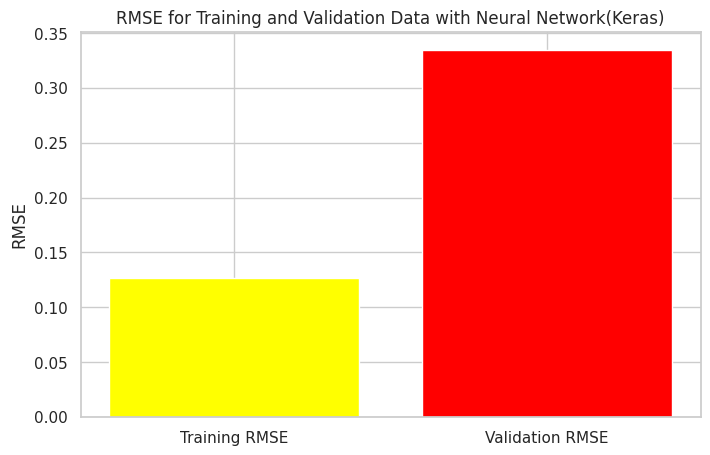

In [ ]:
####model evaluation
rmse_values = [train_rmse_nn, valid_rmse_nn]
labels = ['Training RMSE', 'Validation RMSE']

plt.figure(figsize=(8, 5))
plt.bar(labels, rmse_values, color=['yellow', 'red'])
plt.ylabel('RMSE')
plt.title('RMSE for Training and Validation Data with Neural Network(Keras)')
plt.show()

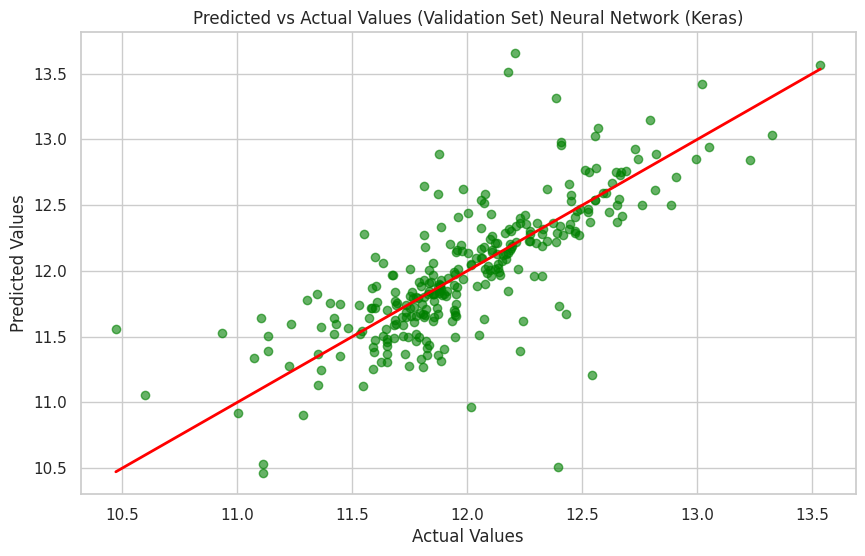

In [ ]:
# Plot Predicted vs Actual Values for Validation Set
#The entire block of code creates a scatter plot comparing the actual values with the predicted values for the validation set.
#The green points represent the predicted values versus the actual values,
#while the red line indicates where the predicted values perfectly match the actual values.
# This plot helps visualize how well the model's predictions align with the actual outcomes.
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, predictions_valid_nn, alpha=0.6, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Validation Set) Neural Network (Keras)')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', lw=2)
plt.show()

## Print and Export of Predictions

In [ ]:
print(submission_best)

In [ ]:
submission_best.to_csv('rf_predictions.csv') # https://pandas.pydata.org/pandas-docs/version/0.18.0/generated/pandas.DataFrame.to_csv.html

In [ ]:
print(submission_cat)

In [ ]:
submission_cat.to_csv('cat1_predictions.csv',index=False) # https://pandas.pydata.org/pandas-docs/version/0.18.0/generated/pandas.DataFrame.to_csv.html

In [ ]:
print(submission_boost)

In [ ]:
submission_boost.to_csv('boost_predictions.csv') # https://pandas.pydata.org/pandas-docs/version/0.18.0/generated/pandas.DataFrame.to_csv.html

In [ ]:
submission_gb.to_csv('gb_predictions(0.009).csv',index=False)

In [ ]:
submission_stack.to_csv('stack(1)_predictions(0.06).csv',index=False)

In [ ]:
print(submission_stack)

In [ ]:
print(submission_cat)

In [ ]:
submission_xgboost_params.to_csv('xgboost(0.09).csv',index=False)